In [232]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
import statsmodels.api as sm 
import warnings
import scipy.stats as spst
import scipy as sp
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer


# Ïò§Î•ò Í≤ΩÍ≥† Î¨¥ÏãúÌïòÍ∏∞
warnings.filterwarnings(action='ignore')
# Ïò§Î•ò Î©îÏÑ∏ÏßÄ Îã§Ïãú Î≥¥Ïù¥Í≤å ÌïòÍ∏∞
#warnings.filterwarnings(action='default')

#ÌïúÍ∏ÄÌëúÏãú
# ÎÇòÎàîÍ∏ÄÍº¥ Í≤ΩÎ°ú ÏÑ§Ï†ï
font_path = 'C:/Windows/Fonts/HANDotum.ttf'
# Ìè∞Ìä∏ Ïù¥Î¶Ñ Í∞ÄÏ†∏Ïò§Í∏∞
font_name = fm.FontProperties(fname=font_path).get_name()
# Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family=font_name)

In [233]:
train_na_1st=pd.read_csv('./train_na_1st.csv')
train_na_1st

ID  Gender         DOB Lead_Creation_Date City_Code  \
0      APPC90493171225  Female  1979-07-23         2016-07-15    C10001   
1      APPD40611263344    Male  1986-12-07         2016-07-04    C10003   
2      APPE70289249423    Male  1982-12-10         2016-07-19    C10125   
3      APPF80273865537    Male  1989-01-30         2016-07-09    C10477   
4      APPG60994436641    Male  1985-04-19         2016-07-20    C10002   
...                ...     ...         ...                ...       ...   
57441  APPT50870248519    Male  1991-03-03         2016-09-30    C10041   
57442  APPU90955789628  Female  1983-07-31         2016-09-30    C10006   
57443  APPV80989824738  Female  1971-01-27         2016-09-30    C10116   
57444  APPW50697209842  Female  1992-02-01         2016-09-30    C10022   
57445  APPY50870035036    Male  1978-06-27         2016-09-30    C10002   

      City_Category Employer_Code Employer_Category1 Employer_Category2  \
0                 A    COM0044082                  A               four   
1                 A    COM0000002                  C                one   
2                 C    COM0005267                  C               four   
3                 C    COM0004143                  A               four   
4                 A    COM0001781                  A               four   
...             ...           ...                ...                ...   
57441             C    COM0000009                  A                one   
57442             A    COM0000010                  A                one   
57443             C    COM0045789                  A               four   
57444             B    COM0013284                  C               four   
57445             A    COM0000098                  C              three   

       Monthly_Income  ... Existing_EMI Loan_Amount Loan_Period Interest_Rate  \
0              2000.0  ...          0.0         NaN         NaN           NaN   
1              3500.0  ...          0.0     20000.0         2.0         13.25   
2              2250.0  ...          0.0     45000.0         4.0           NaN   
3              3500.0  ...          0.0     92000.0         5.0           NaN   
4             10000.0  ...       2500.0     50000.0         2.0           NaN   
...               ...  ...          ...         ...         ...           ...   
57441          2400.0  ...          0.0     30000.0         3.0           NaN   
57442          4900.0  ...          0.0         NaN         NaN           NaN   
57443          7190.1  ...       1450.0         NaN         NaN           NaN   
57444          1600.0  ...          0.0     24000.0         4.0         35.50   
57445          9893.0  ...       1366.0     80000.0         5.0           NaN   

         EMI   Var1  Approved  age  after_Source_Category already_borrowed  
0        NaN   zero        No   37                      G               No  
1      953.0    ten        No   29                      G               No  
2        NaN   zero        No   33                      B               No  
3        NaN  seven        No   27                      B               No  
4        NaN    ten        No   31                      B              Yes  
...      ...    ...       ...  ...                    ...              ...  
57441    NaN    two        No   25                      G               No  
57442    NaN    ten        No   33                      G               No  
57443    NaN  seven        No   45                      G              Yes  
57444  943.0    two        No   24                      G               No  
57445    NaN    ten        No   38                      G              Yes  

[57446 rows x 24 columns]

In [234]:
train_na_1st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57446 entries, 0 to 57445
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   57446 non-null  object 
 1   Gender                               57446 non-null  object 
 2   DOB                                  57446 non-null  object 
 3   Lead_Creation_Date                   57446 non-null  object 
 4   City_Code                            57446 non-null  object 
 5   City_Category                        57446 non-null  object 
 6   Employer_Code                        57446 non-null  object 
 7   Employer_Category1                   57446 non-null  object 
 8   Employer_Category2                   57446 non-null  object 
 9   Monthly_Income                       57446 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  57446 non-null  object 
 11  Primary_Bank_Type           

In [235]:
display(train_na_1st.isna().sum())
#4Í∞úÏùò Ïª¨ÎüºÏóêÏÑú Îß§Ïö∞ÎßéÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä ÌôïÏù∏Îê® 
print('Ï†ÑÏ≤¥ Ìñâ',len(train_na_1st))
#Í≤∞Ï∏°ÏπòÍ∞Ä ÌïòÎÇòÎùºÎèÑ Ï°¥Ïû¨ÌïòÎäî ÌñâÏùò Ïàò
print('Í≤∞Ï∏°Ïπò Ï°¥Ïû¨',len(train_na_1st[train_na_1st[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']].isna().any(axis=1)]))
#Í≤∞Ï∏°ÏπòÍ∞Ä ÌïòÎÇòÎùºÎèÑ Ï°¥Ïû¨ÌïòÎäî ÌñâÏùÑ ÏÇ≠Ï†úÌïòÎ©¥ 3Îßå 8Ï≤úÍ∞úÏùò ÌñâÏù¥ ÎÇ†ÏïÑÍ∞ê(Ï†ÑÏ≤¥Ïùò 67%)
print(37929/57446)
#Îî∞ÎùºÏÑú Í≤∞Ï∏°ÏπòÎ•º inputationÌïòÎäî Î∞©Ïïà Í≥†Î†§

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                  0
City_Category                              0
Employer_Code                              0
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code        0
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Existing_EMI                               0
Loan_Amount                            19858
Loan_Period                            19858
Interest_Rate                          37929
EMI                                    37929
Var1                                       0
Approved                                   0
age                                        0
after_Sour

Ï†ÑÏ≤¥ Ìñâ 57446
Í≤∞Ï∏°Ïπò Ï°¥Ïû¨ 37929
0.6602548480311945


In [236]:
#2Ï∞® Ï†ÑÏ≤òÎ¶¨

#Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Îç∞Ïù¥ÌÑ∞
#'Employer_Category2'
#Í∏∞Ï°¥Ïùò Ïª¨ÎüºÏùÑ Ïù¥Ïö©Ìï¥ Í≤∞Ï∏°ÏπòÎ•º ÏòàÏ∏°Ìï¥ Ï±ÑÏõåÍ∞à ÏòàÏ†ïÏù∏Îç∞, Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî(ÏòàÏ∏°Ìï¥ÏÑú ÎåÄÏπòÌï¥Ïïº Ìï†)Î≥ÄÏàòÏù¥ÎØÄÎ°ú ÌòÑÏû¨Îäî drop
train_na_1st_notNA = train_na_1st.dropna(subset=['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI'])
#Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Îç∞Ïù¥ÌÑ∞ 
#any: Ìï¥Îãπ ÌñâÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÌïòÎÇòÎùºÎèÑ Î∞úÍ≤¨ÎêúÎã§Î©¥ Í≤ÄÏ∂ú
train_na_1st_NA = train_na_1st[train_na_1st[['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI']].isna().any(axis=1)]

In [237]:
train_na_1st_notNA
#Í≤∞Ï∏°ÏπòÏù∏ ÌñâÏùÑ Ï†úÏô∏Ìï¥ÏÑú ÎßéÏù¥ Ï§ÑÏñ¥Îì¶

ID  Gender         DOB Lead_Creation_Date City_Code  \
1      APPD40611263344    Male  1986-12-07         2016-07-04    C10003   
6      APPK80327232033    Male  1973-03-28         2016-07-02    C10022   
7      APPL20820172146  Female  1990-11-12         2016-07-03    C10003   
8      APPM30977401211    Male  1977-03-03         2016-07-02    C10003   
9      APPP50632654511    Male  1983-08-24         2016-07-09    C10030   
...                ...     ...         ...                ...       ...   
57433  APPA20673866612    Male  1985-11-13         2016-09-30    C10057   
57437  APPO60026095033  Female  1982-05-31         2016-09-30    C10006   
57438  APPP40131207148    Male  1986-10-14         2016-09-30    C10001   
57440  APPS20215136404    Male  1986-03-04         2016-09-30    C10002   
57444  APPW50697209842  Female  1992-02-01         2016-09-30    C10022   

      City_Category Employer_Code Employer_Category1 Employer_Category2  \
1                 A    COM0000002                  C                one   
6                 B    COM0030526                  B               four   
7                 A    COM0016738                  A               four   
8                 A    COM0010626                  A               four   
9                 B    COM0002632                  B               four   
...             ...           ...                ...                ...   
57433             C    COM0041137                  A               four   
57437             A    COM0030433                  A               four   
57438             A    COM0011185                  B               four   
57440             A    COM0000003                  B                two   
57444             B    COM0013284                  C               four   

       Monthly_Income  ... Existing_EMI Loan_Amount Loan_Period Interest_Rate  \
1              3500.0  ...          0.0     20000.0         2.0         13.25   
6              7500.0  ...          0.0    130000.0         5.0         14.85   
7              3000.0  ...          0.0     30000.0         3.0         18.25   
8              2500.0  ...          0.0     66000.0         5.0         20.00   
9              2700.0  ...        460.0     20000.0         5.0         18.00   
...               ...  ...          ...         ...         ...           ...   
57433          1500.0  ...          0.0     19000.0         3.0         37.00   
57437          3500.0  ...          0.0     87000.0         5.0         15.25   
57438         13300.0  ...       3400.0     20000.0         4.0         13.99   
57440          4600.0  ...          0.0     30000.0         3.0         13.00   
57444          1600.0  ...          0.0     24000.0         4.0         35.50   

          EMI   Var1  Approved  age  after_Source_Category already_borrowed  
1       953.0    ten        No   29                      G               No  
6      3082.0    ten        No   43                      G               No  
7      1088.0   zero        No   25                      B               No  
8      1749.0  seven        No   39                      B               No  
9       508.0  seven        No   32                      B              Yes  
...       ...    ...       ...  ...                    ...              ...  
57433   881.0    two        No   30                      G               No  
57437  2081.0  seven        No   34                      G               No  
57438   546.0    ten        No   29                      G              Yes  
57440  1011.0    ten        No   30                      G               No  
57444   943.0    two        No   24                      G               No  

[19517 rows x 24 columns]

In [238]:
train_na_1st_NA

ID  Gender         DOB Lead_Creation_Date City_Code  \
0      APPC90493171225  Female  1979-07-23         2016-07-15    C10001   
2      APPE70289249423    Male  1982-12-10         2016-07-19    C10125   
3      APPF80273865537    Male  1989-01-30         2016-07-09    C10477   
4      APPG60994436641    Male  1985-04-19         2016-07-20    C10002   
5      APPI90914237819  Female  1988-12-23         2016-07-01    C10402   
...                ...     ...         ...                ...       ...   
57439  APPR50947529333    Male  1991-08-01         2016-09-30    C10002   
57441  APPT50870248519    Male  1991-03-03         2016-09-30    C10041   
57442  APPU90955789628  Female  1983-07-31         2016-09-30    C10006   
57443  APPV80989824738  Female  1971-01-27         2016-09-30    C10116   
57445  APPY50870035036    Male  1978-06-27         2016-09-30    C10002   

      City_Category Employer_Code Employer_Category1 Employer_Category2  \
0                 A    COM0044082                  A               four   
2                 C    COM0005267                  C               four   
3                 C    COM0004143                  A               four   
4                 A    COM0001781                  A               four   
5                 C    COM0007740                  A               four   
...             ...           ...                ...                ...   
57439             A    COM0000169                  A               four   
57441             C    COM0000009                  A                one   
57442             A    COM0000010                  A                one   
57443             C    COM0045789                  A               four   
57445             A    COM0000098                  C              three   

       Monthly_Income  ... Existing_EMI Loan_Amount Loan_Period Interest_Rate  \
0              2000.0  ...          0.0         NaN         NaN           NaN   
2              2250.0  ...          0.0     45000.0         4.0           NaN   
3              3500.0  ...          0.0     92000.0         5.0           NaN   
4             10000.0  ...       2500.0     50000.0         2.0           NaN   
5              7000.0  ...          0.0         NaN         NaN           NaN   
...               ...  ...          ...         ...         ...           ...   
57439          1500.0  ...          0.0     24000.0         4.0           NaN   
57441          2400.0  ...          0.0     30000.0         3.0           NaN   
57442          4900.0  ...          0.0         NaN         NaN           NaN   
57443          7190.1  ...       1450.0         NaN         NaN           NaN   
57445          9893.0  ...       1366.0     80000.0         5.0           NaN   

       EMI   Var1  Approved  age  after_Source_Category already_borrowed  
0      NaN   zero        No   37                      G               No  
2      NaN   zero        No   33                      B               No  
3      NaN  seven        No   27                      B               No  
4      NaN    ten        No   31                      B              Yes  
5      NaN   zero        No   27                      B               No  
...    ...    ...       ...  ...                    ...              ...  
57439  NaN    two        No   25                      G               No  
57441  NaN    two        No   25                      G               No  
57442  NaN    ten        No   33                      G               No  
57443  NaN  seven        No   45                      G              Yes  
57445  NaN    ten        No   38                      G              Yes  

[37929 rows x 24 columns]

In [239]:
##'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI' Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏàúÏÑú 

#ÎåÄÏ∂úÍ∏à(Loan_Amount) ÏòàÏ∏° ÌõÑ Ïù¥ÏûêÏú®(Interest_Rate) ÏÇ∞Ï∂ú 
#ÎåÄÏ∂úÍ∏àÏù¥ ÌÅ¥ÏàòÎ°ù ÎåÄÏ∂ú Ïù¥ÏûêÏú®ÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏïÑÏßà Ïàò ÏûàÎã§. 
#ÎåÄÏ∂ú Ïù¥ÏûêÏú®ÏùÄ ÎåÄÏ∂úÏï°, ÎåÄÏ∂úÍ∏∞Í∞Ñ, Ïã†Ïö©Îì±Í∏â, Îã¥Î≥¥Ïùò Ïó¨Î∂Ä Îì± Ïó¨Îü¨ ÏöîÏù∏Ïóê Îî∞Îùº Í≤∞Ï†ïÎêòÎäîÎç∞, 
#ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎåÄÏ∂úÏï°Ïù¥ ÌÅ¨Î©¥ ÎÜíÏùÄ Í∏àÏï°Ïóê ÎåÄÌïú ÎåÄÏ∂úÏóê ÎåÄÌïú ÏúÑÌóòÏùÑ ÏÉÅÏáÑÌïòÍ∏∞ ÏúÑÌï¥ ÎÇÆÏùÄ Ïù¥ÏûêÏú®Ïù¥ Ï†úÍ≥µÎê† Ïàò ÏûàÎã§. 
#Ï¶â ÎåÄÏ∂úÍ∏àÏù¥ ÌÅ¨Î©¥ ÎåÄÏ∂úÍ∏∞Í¥ÄÏùÄ ÎÜíÏùÄ Í∏àÏï°ÏùÑ ÎåÄÏ∂úÌï¥Ï£ºÎäî ÎåÄÏã† ÏïàÏ†ïÏ†ÅÏù∏ Í≥†Í∞ùÏóêÍ≤å Îçî ÎÇÆÏùÄ Ïù¥ÏûêÏú®ÏùÑ Ï†úÍ≥µÌï† Ïàò ÏûàÎã§. 
#Ïù¥Îäî ÎåÄÏ∂úÍ∏∞Í¥ÄÏù¥ ÎåÄÏ∂úÏùÑ ÌÜµÌï¥ ÏñªÎäî Ïù¥Ïûê ÏàòÏùµÏùÑ ÎåÄÏ∂úÍ∏àÏï°Ïóê ÎπÑÎ°ÄÌï¥ Í≤∞Ï†ïÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. 

#ÎåÄÏ∂úÍ∏à(Loan_Amount) ÏòàÏ∏° ÌõÑ ÏÉÅÌôòÍ∏∞Í∞Ñ(Loan_Period) ÏÇ∞Ï∂ú 
#ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎåÄÏ∂úÍ∏àÏù¥ ÎßéÏùÑ Í≤ΩÏö∞ Ïõî ÏÉÅÌôòÏï°ÏùÑ ÎÇÆÏ∂îÍ∏∞ ÏúÑÌï¥ ÎåÄÏ∂úÍ∏∞Í∞ÑÏùÑ Ïó∞Ïû•ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§. 
#ÎåÄÏ∂úÍ∏àÏù¥ ÌÅ¨Îã§Îäî Í≤ÉÏùÄ ÎåÄÏ∂úÏùÑ Î∞õÎäî Í∏àÏï°Ïù¥ ÎßéÎã§Îäî ÏùòÎØ∏Ïù¥Îã§. ÎåÄÏ∂úÍ∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù Ïù¥Îü∞ Í≤ΩÌñ•ÏùÄ Í∞ïÌï¥ÏßÑÎã§. 

#ÎåÄÏ∂úÍ∏à(Loan_Amount)Í≥º Ïù¥ÏûêÏú®(Interest_Rate), ÏÉÅÌôòÍ∏∞Í∞Ñ(Loan_Period) ÏòàÏ∏° ÌõÑ EMIÏÇ∞Ï∂ú 
#ÎåÄÏ∂úÍ∏àÏù¥ ÌÅ¥ÏàòÎ°ù, ÏÉÅÌôòÍ∏∞Í∞ÑÏù¥ Í∏∏ÏàòÎ°ù EMI(Ïõî Ìï†Î∂ÄÍ∏à)Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎÇÆÏïÑÏßà Í≤ÉÏù¥Îã§. 
#ÎåÄÏ∂úÍ∏àÏù¥ ÌÅ¨Î©¥ Îß§Ïõî ÏÉÅÌôòÌï¥Ïïº ÌïòÎäî Í∏àÏï°Ïù¥ ÎÜíÏïÑÏßÄÎØÄÎ°ú, ÏÉÅÌôòÍ∏∞Í∞ÑÏùÑ ÎäòÎ¶¨Î©¥ Ïõî Ìï†Î∂ÄÍ∏àÏùÑ ÎÇÆÏ∂îÍ∏∞ ÏúÑÌïú Ï°∞Ï†ïÏù¥ Í∞ÄÎä•ÌïòÎã§. 
#Í∑∏Îü¨ÎÇò ÏÉÅÌôòÍ∏∞Í∞ÑÏù¥ Í∏∏Ïñ¥ÏßÄÎ©¥ Ï¥ù ÏÉÅÌôòÏï°Ïù¥ Ï¶ùÍ∞ÄÌïòÍ≤å ÎêòÎØÄÎ°ú, Ïù¥Îäî Ïû•Í∏∞Ï†ÅÏù∏ Í¥ÄÏ†êÏóêÏÑú Í≥†Î†§Ìï¥Ïïº ÌïúÎã§. 
#ÎòêÌïú, ÎåÄÏ∂ú ÏÉÅÌôòÍ∏∞Í∞ÑÏù¥ Í∏∏Ïñ¥ÏßàÏàòÎ°ù Ïù¥Ïûê ÎπÑÏö©ÎèÑ Ï¶ùÍ∞ÄÌï† Ïàò ÏûàÎã§.

#ÎåÄÏ∂úÍ∏à(Loan_Amount)> Ïù¥ÏûêÏú®(Interest_Rate), ÏÉÅÌôòÍ∏∞Í∞Ñ(Loan_Period) > EMI ÏàúÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥Îã§. 

In [240]:
#1. Loan_Amount

In [241]:
train_na_1st_notNA.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate',
       'EMI', 'Var1', 'Approved', 'age', 'after_Source_Category',
       'already_borrowed'],
      dtype='object')

In [242]:
# ÌïôÏäµÏãú ID, Approved, DOB, Lead_Creation_Date Ïª¨ÎüºÏùÄ ÌïÑÏöîÏóÜÏúºÎØÄÎ°ú drop 
#Í≤∞Ï∏°ÏπòÎ•º ÏòàÏ∏°ÌïòÎäîÎç∞ 'Loan_Amount', 'Loan_Period', 'Interest_Rate','EMI'Ïª¨ÎüºÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞ ÎòëÍ∞ôÏù¥ Í≤∞Ï∏°ÏπòÏù∏ Í≤ΩÏö∞Í∞Ä ÎßéÏúºÎØÄÎ°ú drop

col=set(train_na_1st_notNA.columns)-set(['ID', 'Approved', 'DOB', 'Lead_Creation_Date', 'Loan_Amount', 'Loan_Period', 'Interest_Rate','EMI'])
col

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Category2',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Var1',
 'after_Source_Category',
 'age',
 'already_borrowed'}

In [243]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàò(Ï±ÑÏõåÏïºÌï† Í≤∞Ï∏°Ïπò Ïª¨ÎüºÎì§ Ï†úÏô∏ÌïòÍ≥† ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ä Îê† default Ïª¨ÎüºÎì§)
not_obj_col = [i for i in train_na_1st_NA.columns if (train_na_1st_NA[i].dtype!='object')  & (i not in ['Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI',])]
not_obj_col=not_obj_col+['Loan_Amount']
not_obj_col

['Monthly_Income', 'Existing_EMI', 'age', 'Loan_Amount']

In [244]:
# ÌöåÍ∑ÄÎ∂ÑÏÑù Ï∞∏Í≥†
#https://roytravel.tistory.com/355

In [1]:
#Î∂ÑÌè¨ ÌôïÏù∏
#Ïó∞ÏÜçÌòï Í∞íÏùÑ Í∞ÄÏßÑ Ïª¨ÎüºÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏(histogram)
#pd.options.plotting.backend = "plotly" Í∏∞Î≥∏Ï†ÅÏúºÎ°ú plotlyÎ•º Ïù¥Ïö©Ìï¥ pandasÏóêÏÑú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïàò ÏûàÍ≤åÌïòÎäî ÏòµÏÖò 

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1, subplot_titles=not_obj_col)

#1Î∂ÄÌÑ∞ ÏãúÏûë
for i, v in enumerate (not_obj_col,1):
    #print(row, col)
    #ÌïúÏû•Ïî© histogramÏùÑ Í∑∏Î¶º
    histo = go.Histogram(x=train_na_1st_notNA[v], name=f'Column {v}')
    fig.add_trace(histo, row=i, col=1)
    
fig.update_layout(title_text="Ïó∞ÏÜçÌòï Í∞íÏùÑ Í∞ÄÏßÑ Ïª¨ÎüºÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏", height=1200, width=1000, showlegend=False)
fig.show()

#Î™®Îì† Ïª¨ÎüºÎì§Ïù¥ ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥§Í∏∞ ÎïåÎ¨∏Ïóê Î°úÍ∑∏Î≥ÄÌôòÏù¥ ÌïÑÏöîÌï¥Î≥¥ÏûÑ
#ÎòêÌïú ageÎ≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§ÏóêÏÑú Î∂ÑÌè¨Í∞Ä ÏßÄÎÇòÏπòÍ≤å ÏôºÏ™ΩÏúºÎ°ú Ïè†Î¶¨Îäî ÌòÑÏÉÅÏù¥ Î≥¥ÏòÄÏúºÎØÄÎ°ú Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥ÏûÑ

NameError: name 'not_obj_col' is not defined

In [246]:
#Î≥ÄÏàò Î≥ÄÌôò
#logÎ≥ÄÌôòÏùÑ ÌïòÎ©¥ 0Ïù¥ ÎÇòÏò§Îäî Í∞íÏùÄ -infÎ°ú Îñ†ÏÑú Ïì∏ Ïàò ÏóÜÎã§. 
#ÏµúÏÜåÍ∞íÏù¥ 0Ïù∏ Ïª¨ÎüºÏùÑ ÎåÄÏÉÅÏúºÎ°ú Ï†ÑÏ≤¥Ïóê +1ÏùÑ Ìï¥ÏÑú Î™®Îëê 0ÏùÑ Ï¥àÍ≥ºÌïòÎäî ÏñëÏàòÎ°ú ÎßåÎì†Îí§ Î≥ÄÌôò ÏàòÌñâ 

#Î£®Ìä∏Î≥ÄÌôò 
# print(np.sqrt(train_na_1st_notNA[['Existing_EMI_log']]))
# print(train_na_1st_notNA['Existing_EMI_log'].skew())

#box-cox Î≥ÄÌôò
# print(spst.boxcox(train_na_1st_notNA['Existing_EMI_log']))
# print(train_na_1st_notNA['Existing_EMI_log'].skew())

#==

#https://seeyapangpang.tistory.com/34
#ÏôºÏ™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÎ©¥ log, Î£®Ìä∏, Ïó≠ÏàòÎ≥ÄÌôò 
#Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏπòÏö∞ÏπòÎ©¥ ÏßÄÏàò, Í±∞Îì≠Ï†úÍ≥± Î≥ÄÌôò 

#Ï¢åÏ∏°ÏúºÎ°ú ÏπòÏö∞ÏπòÎ©¥ ÏôúÎèÑ Í∞íÏùÄ ÏñëÏàò 
#Ïö∞Ï∏°ÏúºÎ°ú ÏπòÏö∞ÏπòÎ©¥ ÏôúÎèÑ Í∞íÏùÄ ÏùåÏàò
#0Ïóê Í∞ÄÍπåÏö¥ Í∞íÏù¥ Ïù¥ÏÉÅÏ†Å

#Ïö∞Ï∏°ÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÏö∞
#https://dining-developer.tistory.com/18
# y'= -y - min(-y)
# y'= -y - min(-y) + c(ÏÉÅÏàò) (ÎßåÏïΩ Í∞íÏù¥ 0Î≥¥Îã§ ÏûëÏùÑ Í≤ΩÏö∞ ÏûÑÏùòÏùò ÏÉÅÏàòÎ•º ÎçîÌï¥ ÏñëÏàòÎ°ú ÎßåÎì§Ïñ¥Ï§ÄÎã§)

#==
#https://recipesds.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-%EB%A1%9C%EA%B7%B8-%EB%B3%80%ED%99%98-%ED%96%88%EC%9D%84-%EB%95%8C-%EB%B2%8C%EC%96%B4%EC%A7%80%EB%8A%94-%EC%9D%BC%EA%B3%BC-%EA%B2%B0%EA%B3%BC-%ED%95%B4%EC%84%9D
#https://velog.io/@cosmicdev/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EB%A1%9C%EA%B7%B8-%EB%B3%80%ED%99%98

#Î≥ÄÏàòÎ≥ÄÌôòÏùÄ Ïôú Ìï¥Ï§òÏïº ÌïòÎÇòÏöî?
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í∞ÄÏ†ïÏù∏ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±ÌïòÍ∏∞ ÏúÑÌï®Ïù¥Î©∞ Î≥ÄÏàòÎ≥ÄÌôòÏùÑ ÌÜµÌï¥ Ï†ïÍ∑úÏÑ±ÏùÑ ÎÜíÏùº Ïàò ÏûàÎã§. 
#Îç∞Ïù¥ÌÑ∞Í∞Ñ Ìé∏Ï∞®Î•º Ï§ÑÏùº Ïàò ÏûàÎã§.

#logÎ≥ÄÌôò ÌõÑ standardScaler 

#Ï†ïÍ∑úÏÑ± ÌôïÏù∏ 
#https://signature95.tistory.com/14

#Î°úÍ∑∏Î≥ÄÌôòÍ≥º Ïä§ÏºÄÏùºÎßÅ
#https://medium.com/@sjacks/feature-transformation-21282d1a3215

#Î°úÍ∑∏Î≥ÄÌôòÏóê ÎåÄÌïú Í≥†Ï∞∞
#https://challenge.tistory.com/46

In [247]:
#Î°úÍ∑∏Î≥ÄÌôò ÌõÑ(ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í∞ÄÏ†ïÏ§ë Ï†ïÍ∑úÏÑ± ÎßåÏ°±)Ïóê ÌëúÏ§ÄÌôî(Îã®ÏúÑÍ∞Ä Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò Îã®ÏúÑ ÌëúÏ§ÄÌôî) 
#ÌëúÏ§ÄÌôî ÌõÑÏóê Î°úÍ∑∏Î≥ÄÌôòÏùÑ ÌïòÎ©¥ 0Î∂ÄÌÑ∞ 1ÏÇ¨Ïù¥Î°ú Í∞íÏù¥ Î≥ÄÌôòÎêòÍ∏∞ ÎïåÎ¨∏Ïóê 0Ïù∏ Í∞íÏùÄ -infÎ°ú Î≥ÄÌôòÎêúÎã§. 

In [248]:
#Î≥ÄÏàò Î≥ÄÌôòÏ†Ñ ÏµúÏÜåÍ∞í ÌôïÏù∏ 
#train_na_1st_notNA[['Existing_EMI','age','Monthly_Income','Loan_Amount']].describe()
train_na_1st_notNA[not_obj_col].describe()
#Existing_EMIÍ∞Ä ÏµúÏÜåÍ∞íÏù¥ 0Ïù¥ÎØÄÎ°ú Ï†ÑÏ≤¥Ïóê +1ÏùÑ Ìï¥ 0ÏùÑ Î°úÍ∑∏Î≥ÄÌôòÌñàÏùÑ Îïå -infÍ∞íÏù¥ ÏïàÎÇòÏò§Í≤å Ìï¥Ï§Ñ ÌïÑÏöî ÏûàÏñ¥Î≥¥ÏûÑ

Monthly_Income  Existing_EMI           age    Loan_Amount
count    1.951700e+04  19517.000000  19517.000000   19517.000000
mean     6.980354e+03    212.736873     29.801353   36821.232771
std      2.789480e+05    728.425557      5.441630   28064.633554
min      8.000000e+02      0.000000     18.000000    5000.000000
25%      2.000000e+03      0.000000     26.000000   20000.000000
50%      2.630000e+03      0.000000     29.000000   30000.000000
75%      4.100000e+03    200.000000     33.000000   48000.000000
max      3.838384e+07  62626.600000     47.000000  250000.000000

In [249]:
train_na_1st_notNA['Existing_EMI']=train_na_1st_notNA['Existing_EMI']+1

In [250]:
train_na_1st_notNA[not_obj_col].describe()

Monthly_Income  Existing_EMI           age    Loan_Amount
count    1.951700e+04  19517.000000  19517.000000   19517.000000
mean     6.980354e+03    213.736873     29.801353   36821.232771
std      2.789480e+05    728.425557      5.441630   28064.633554
min      8.000000e+02      1.000000     18.000000    5000.000000
25%      2.000000e+03      1.000000     26.000000   20000.000000
50%      2.630000e+03      1.000000     29.000000   30000.000000
75%      4.100000e+03    201.000000     33.000000   48000.000000
max      3.838384e+07  62627.600000     47.000000  250000.000000

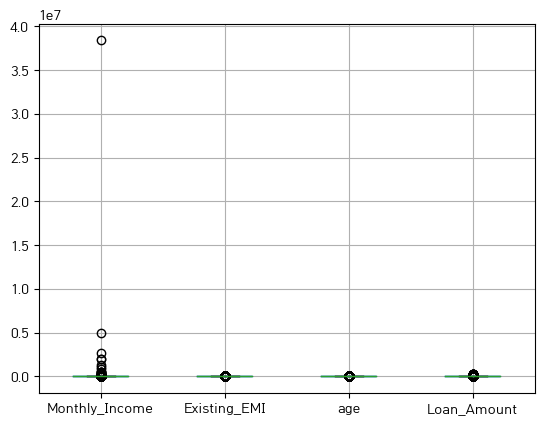

In [251]:
#boxplot 
train_na_1st_notNA[not_obj_col].boxplot()
#monthly incomeÏóêÏÑú ÏÉÅÎãπÌûà ÎëêÎìúÎü¨ÏßÄÎäî Ïù¥ÏÉÅÏπòÍ∞∏ Î∞úÍ≤¨ÎêòÏñ¥ Ìï¥Îãπ Ïù¥ÏÉÅÏπò Ìñâ ÏÇ≠Ï†ú ÌõÑ log Î≥ÄÌôò 

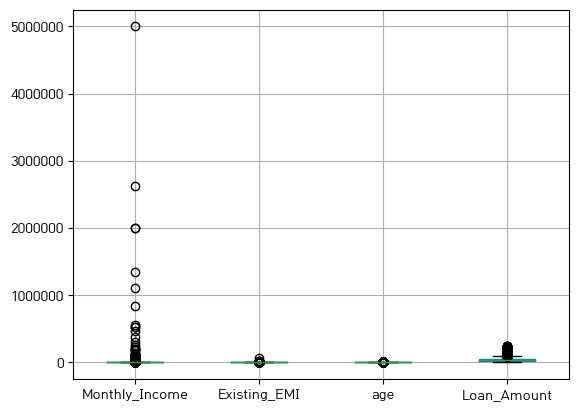

In [252]:
#Ïù¥ÏÉÅÏπò 1Ï∞® Ï†úÍ±∞
train_na_1st_notNA=train_na_1st_notNA[train_na_1st_notNA['Monthly_Income']<train_na_1st_notNA['Monthly_Income'].max()]
train_na_1st_notNA[not_obj_col].boxplot()

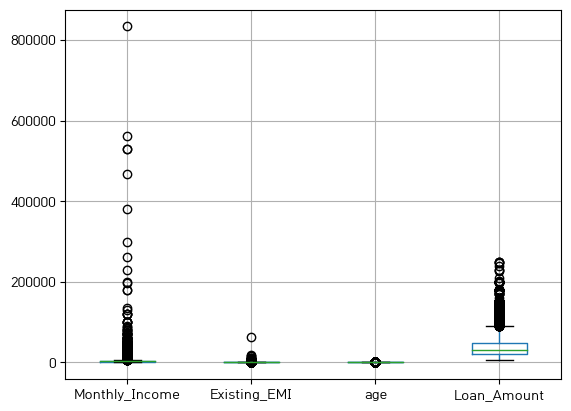

In [230]:
train_na_1st_notNA=train_na_1st_notNA[train_na_1st_notNA['Monthly_Income']<train_na_1st_notNA['Monthly_Income'].max()]
train_na_1st_notNA[not_obj_col].boxplot()

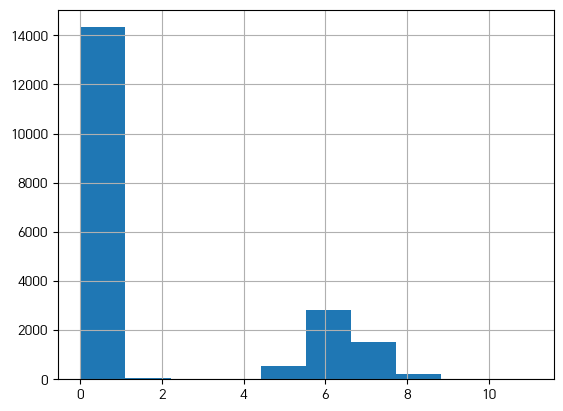

In [255]:
np.log(train_na_1st_notNA['Existing_EMI']).hist()

In [ ]:
#Î≥ÄÌôòÏùÑ Ìï¥ÎèÑ Ï†ïÍ∑úÎ∂ÑÌè¨ ÌòïÌÉúÍ∞Ä ÎêòÏßÄ ÏïäÏúºÎØÄÎ°ú Î≤îÏ£ºÌôî ÏßÑÌñâ 


In [257]:
train_na_1st_notNA['Existing_EMI'],map(x: x//10)

SyntaxError: invalid syntax (3807076611.py, line 1)

In [20]:
#apply Ìï®Ïàò ÏòàÏãú

# test_df = pd.DataFrame({'test':[1,2,3],'test2':[4,5,6] })
# def re_value(x):
#     return x+1
    
# test_df['N'] = test_df['test'].apply(re_value)
# test_df
#Ïó¨Îü¨ Ïª¨ÎüºÏùÑ ÎåÄÏÉÅÏúºÎ°ú applyÌï®ÏàòÎ•º Ï†ÅÏö©ÌïòÎ©¥ Îß® ÏïûÏùò Ïª¨ÎüºÏóê ÎåÄÌï¥ÏÑúÎßå Ìï®ÏàòÍ∞Ä Ï†ÅÏö©ÎêòÏÑú ÎÇ¥Í∞Ä ÏùòÎèÑÌïòÎäîÎåÄÎ°ú Í≤∞Í≥ºÍ∞íÏù¥ Ïïà ÎÇòÏò¥ 
#Îî∞ÎùºÏÑú Í∞úÎ≥Ñ Ïª¨Îüº ÌïòÎÇòÏî© logÎ≥ÄÌôò ÏàòÌñâ 

In [133]:
#1Ï∞®Ï†ÅÏúºÎ°ú Ï†ÑÏ≤¥ logÎ≥ÄÌôòÏùÑ ÌÜµÌï¥ Ï†ïÍ∑úÏÑ± ÌôïÏù∏ (Ï†ïÍ∑úÎ∂ÑÌè¨Îäî ÏôúÎèÑÍ∞Ä 0)
print('Existing_EMI')
print('Ï†Ñ',train_na_1st_notNA['Existing_EMI'].skew())
train_na_1st_notNA['Existing_EMI_log']=np.log(train_na_1st_notNA['Existing_EMI'])
print('ÌõÑ',train_na_1st_notNA['Existing_EMI_log'].skew())
#Existing_EMI ÌôïÏù∏ ÌïÑÏöî

print('age')
print('Ï†Ñ',train_na_1st_notNA['age'].skew())
train_na_1st_notNA['age_log']=np.log(train_na_1st_notNA['age'])
print('ÌõÑ',train_na_1st_notNA['age_log'].skew())

print('Monthly_Income')
print('Ï†Ñ',train_na_1st_notNA['Monthly_Income'].skew())
train_na_1st_notNA['Monthly_Income_log']=np.log(train_na_1st_notNA['Monthly_Income'])
print('ÌõÑ',train_na_1st_notNA['Monthly_Income_log'].skew())
#Ïó¨Ï†ÑÌûà logÍ∞íÏùÑ Ï∑®Ìï¥ÎèÑ monthly_incomeÏùÄ ÏπòÏö∞Ïπú ÏÉÅÌÉúÏù¥ÎØÄÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î•º Í≥†Î†§

print('Loan_Amount')
print('Ï†Ñ',train_na_1st_notNA['Loan_Amount'].skew())
train_na_1st_notNA['Loan_Amount_log']=np.log(train_na_1st_notNA['Loan_Amount'])
print('ÌõÑ',train_na_1st_notNA['Loan_Amount_log'].skew())

Existing_EMI
Ï†Ñ 36.37073121909287
ÌõÑ 1.1370593198766208
age
Ï†Ñ 0.8995283372431795
ÌõÑ 0.46532093057821683
Monthly_Income
Ï†Ñ 133.8275478039762
ÌõÑ 2.0243570054702005
Loan_Amount
Ï†Ñ 2.121641697770982
ÌõÑ -0.040299724225861935


In [ ]:
#https://m.blog.naver.com/statsol/221383689303
#Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï 

In [135]:
train_na_1st_notNA[not_obj_col].describe()

Monthly_Income  Existing_EMI           age    Loan_Amount
count    1.951700e+04  19517.000000  19517.000000   19517.000000
mean     6.980354e+03    213.736873     29.801353   36821.232771
std      2.789480e+05    728.425557      5.441630   28064.633554
min      8.000000e+02      1.000000     18.000000    5000.000000
25%      2.000000e+03      1.000000     26.000000   20000.000000
50%      2.630000e+03      1.000000     29.000000   30000.000000
75%      4.100000e+03    201.000000     33.000000   48000.000000
max      3.838384e+07  62627.600000     47.000000  250000.000000

In [141]:
train_na_1st_notNA['Existing_EMI'].describe()

count    19517.000000
mean       213.736873
std        728.425557
min          1.000000
25%          1.000000
50%          1.000000
75%        201.000000
max      62627.600000
Name: Existing_EMI, dtype: float64

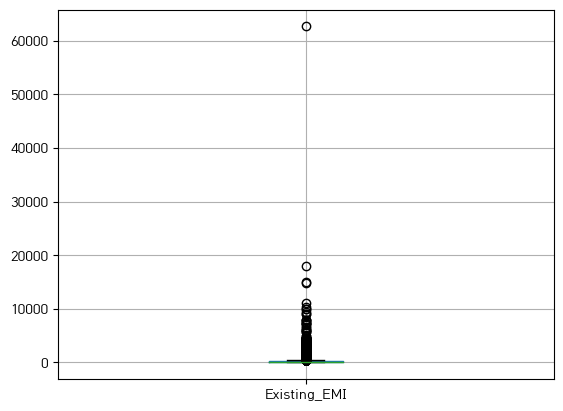

In [144]:
train_na_1st_notNA[['Existing_EMI']].boxplot()
#Í∞ÄÏû• ÏÉÅÎã®Ïóê Ï°¥Ïû¨ÌïòÎäî Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÍ≥† ÌôïÏù∏ 

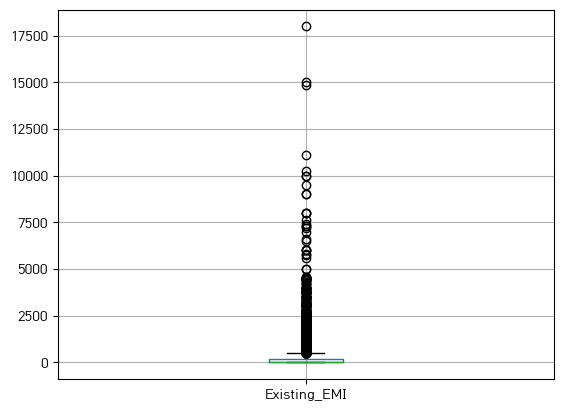

In [146]:
train_na_1st_notNA= train_na_1st_notNA[train_na_1st_notNA['Existing_EMI']<60000]
train_na_1st_notNA[['Existing_EMI']].boxplot()

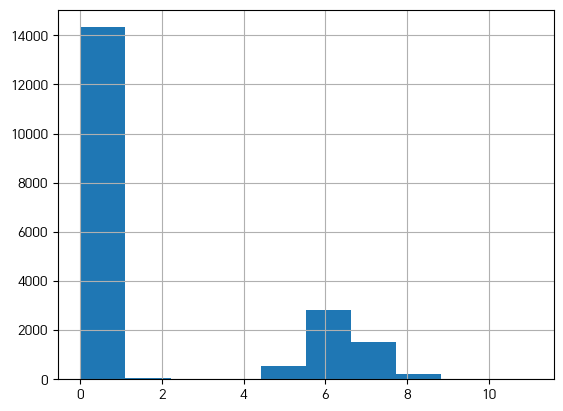

In [136]:
train_na_1st_notNA['Existing_EMI_log'].hist()

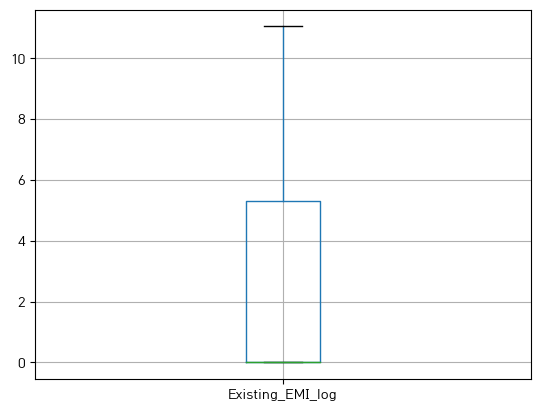

In [138]:
train_na_1st_notNA[['Existing_EMI_log']].boxplot()
#Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§.

count    19517.000000
mean       213.736873
std        728.425557
min          1.000000
25%          1.000000
50%          1.000000
75%        201.000000
max      62627.600000
Name: Existing_EMI, dtype: float64

In [ ]:
train_na_1st_notNA['Existing_EMI_log']

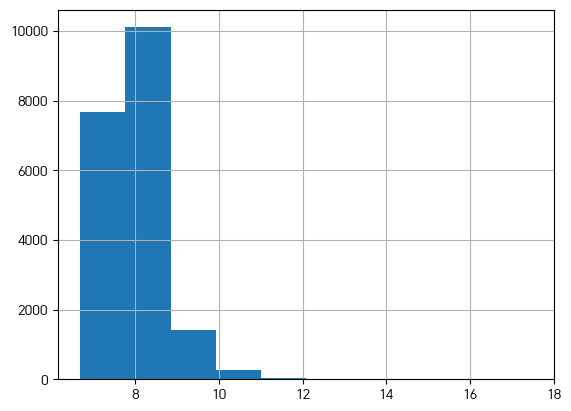

In [27]:
train_na_1st_notNA['Monthly_Income_log'].hist()

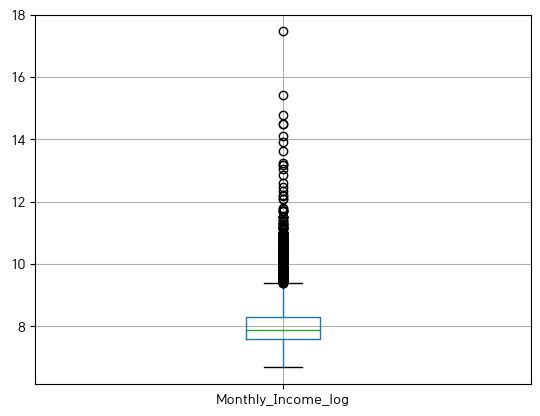

In [28]:
#Monthly Income
train_na_1st_notNA[['Monthly_Income_log']].boxplot()
#Ìï¥Îãπ Î≥ÄÏàòÏóê Ïù¥ÏÉÅÏπòÍ∞Ä ÏÉÅÎãπ Î∂ÄÎ∂Ñ Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏ Îî∞ÎùºÏÑú Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Í∞Ä ÌïÑÏöî

In [29]:
#IQRÍ∏∞Ï§Ä Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
column_data = train_na_1st_notNA['Monthly_Income']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

#Ïù¥ÏÉÅÏπò ÏÉÅÌïúÍ∏∞Ï§Ä, ÌïòÌïúÍ∏∞Ï§Ä
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

#Ïù¥ÏÉÅÏπò
print(outliers, len(outliers))

6         7500.0
21        7500.0
28       12000.0
63       10000.0
101      10050.0
          ...   
57359    30000.0
57413     8000.0
57430     8000.0
57431     8000.0
57438    13300.0
Name: Monthly_Income, Length: 1583, dtype: float64 1583


In [30]:
#Ïù¥ÏÉÅÏπò Ìñâ drop
print('Ï†ÑÏ≤¥ Ìñâ',len(train_na_1st_notNA))
train_na_1st_notNA.drop(index=outliers.index, inplace=True)
#Ïù¥ÏÉÅÏπòÎäî 739Í∞úÎ°ú ÏÇ≠Ï†úÌï¥ÎèÑ Í¥úÏ∞ÆÏùÄÍ≤É Í∞ôÏïÑ Ìï¥Îãπ ÌñâÎì§ ÏÇ≠Ï†ú

Ï†ÑÏ≤¥ Ìñâ 19517


In [31]:
#Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Î∞è Î≥ÄÌôò ÌõÑ Ïû¨ÌôïÏù∏
print(train_na_1st_notNA['Monthly_Income'].skew())
train_na_1st_notNA['Monthly_Income_log']=np.log(train_na_1st_notNA['Monthly_Income'])
print(train_na_1st_notNA['Monthly_Income_log'].skew())
#Ìõ®Ïî¨ ÎÇòÏïÑÏ°åÎã§. 

1.0587463415412732
0.3025031400070032


In [32]:
# ÌîºÏ≥ê Ïä§ÏºÄÏùºÎßÅ
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Ïùò Í∞íÏùò Î≤îÏúÑÎ•º ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï® 

# https://lucian-blog.tistory.com/106
# https://soo-jjeong.tistory.com/122 

# Ï†ïÍ∑úÌôîÎ•º Ïôú Ìï¥Ï§òÏïºÌïòÎÇòÏöî? 
# Í∞Å Î≥ÄÏàòÎì§Ïùò Îã®ÏúÑÍ∞Ä Îã¨Îùº Ïù¥Î•º ÎßûÏ∂∞Ï§òÏïºÌïòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. 
# Ïù¥Î†áÍ≤å ÏïàÌï¥Ï£ºÎ©¥ Îã®ÏúÑÍ∞Ä ÌÅ∞ Î≥ÄÏàòÏùò ÏòÅÌñ•Ïù¥ ÎÜíÍ≤å ÎÇòÏò¨ Ïàò ÏûàÎã§. 

# Ï†ïÍ∑úÌôî
# Ï†ïÍ∑úÌôîÎäî Í∞íÏùò Î≤îÏúÑÎ•º 0~1ÏÇ¨Ïù¥Î°ú ÏòÆÍ≤®Ï§ÄÎã§. Î™®Îì† Îç∞Ïù¥ÌÑ∞Ïùò Îã®ÏúÑÍ∞Ä Î™®Îëê 0~1ÏÇ¨Ïù¥Î°ú ÏòÆÍ≤®ÏßÄÍ≤å Ìï¥Ï£ºÎäî Í≤ÉÏù¥Îã§.
# Ïù¥Îü¨Î©¥ Îç∞Ïù¥ÌÑ∞Ïùò Ïª¨ÎüºÎì§Ïù¥ ÌèâÎì±ÌïòÍ≤å 0~1ÏÇ¨Ïù¥Î°ú ÎÜìÏó¨ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Í≥ÑÍ∞Ä ÌïôÏäµÌïòÍ∏∞Ïóê Ïñ¥Îäê Ïª¨ÎüºÏóê Ï§ëÏ†êÏùÑ ÎëêÍ≥† ÌïôÏäµÌïòÍ∏∞Î≥¥Îã® ÌèâÎì±ÌïòÍ≤å Ïª¨ÎüºÎì§ÏùÑ Î≥¥Í≥† ÌïôÏäµÏãúÌÇ®Îã§.

# ÌëúÏ§ÄÌôî
# ÌëúÏ§ÄÌôîÎäî Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∞ÄÏ†ïÌïòÏóê Ïã§ÏãúÎêúÎã§.(Ï†ïÍ∑úÎ∂ÑÌè¨Îäî Ï¢ÖÎ™®Ïñë Î∂ÑÌè¨ÏûÑ)
# Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í∞ÄÏ†ïÌïòÏóê Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∑†ÏùÄ 0, ÌëúÏ§ÄÌé∏Ï∞®Îäî 1Ïù¥ ÎêòÎèÑÎ°ù ÎßåÎì§Ïñ¥Ï§ÄÎã§. 
# Í∑∏Î†áÍ∏∞Ïóê ÌèâÍ∑†ÏùÄ 0Ïù¥ÎãàÍπê 0Ïùò Í∑ºÏ≤òÎ°ú ÎßéÏù¥ Ïû°Ìûê Í≤ÉÏù¥Îã§. 0Ïùò Ï¢åÏö∞Î°ú ÌëúÏ§ÄÌé∏Ï∞® 1Ïù¥ ÎêòÍ≤å Î∂ÑÌè¨Í∞Ä Îê† Í≤ÉÏù¥Îã§.

# Î™®Îç∏Ïóê Îî∞Îùº Ï†ïÍ∑úÌôîÎ•º Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞íÏù¥ Îçî ÎÜíÏùÑ ÏàòÎèÑ ÏûàÍ≥† ÌëúÏ§ÄÌôîÎ•º Ìïú Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞íÏù¥ Îçî ÎÜíÏùÑ ÏàòÍ∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îëò Îã§ ÎπÑÍµêÌï¥ Î≥¥Îäî Í≤ÉÏùÑ Ï∂îÏ≤úÌïúÎã§.

# Monthly_Income, Existing_EMI, Loan_AmountÎäî Î™®Îëê ÎèôÏùºÌïú ÏàòÏπòÎã®ÏúÑÎ•º Í≥µÏú†ÌïòÏßÄÎßå ageÎäî Í∑∏Î†áÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Îã®ÏúÑ Ï†ïÍ∑úÌôîÍ∞Ä ÌïÑÏöî

from sklearn.preprocessing import MinMaxScaler  
scaler=MinMaxScaler() 

#ÏúÑÏóêÏÑú ÏÉùÏÑ±Ìïú 'Existing_EMI_log', 'age_log','Monthly_Income_log' ÌôúÏö©
scaled=scaler.fit_transform(train_na_1st_notNA[['Existing_EMI_log', 'age_log', 'Monthly_Income_log']])   
scaled_train_na_1st_notNA = pd.DataFrame(scaled, index=train_na_1st_notNA[['Existing_EMI_log', 'age_log', 'Monthly_Income_log']].index, columns=['Existing_EMI_log', 'age_log', 'Monthly_Income_log'])
scaled_train_na_1st_notNA.head()

Existing_EMI_log   age_log  Monthly_Income_log
1           0.000000  0.496912            0.671714
7           0.000000  0.342272            0.601557
8           0.000000  0.805594            0.518579
9           0.762910  0.599478            0.553605
10          0.689743  0.496912            0.586034

In [33]:
#Î≤îÏ£ºÌòï Î≥ÄÏàò ÌôïÏù∏
train_na_1st_notNA.columns
#IDÎÇò ÎÇ†ÏßúÏóê Ìï¥ÎãπÌïòÎäî DOB, Lead_Creation_DateÎäî ÏùòÎØ∏Í∞Ä ÏóÜÏúºÎØÄÎ°ú Ï†úÏô∏
obj_col=[i for i in train_na_1st_notNA.columns if (train_na_1st_notNA[i].dtype =='object') and (i not in ['ID', 'DOB', 'Lead_Creation_Date']) ]
train_na_1st_notNA[obj_col].nunique() 
#City_Code, Employer_Code, Customer_Existing_Primary_Bank_Code, Source_Category Ïª¨ÎüºÎì§ÏùÄ Î†àÏù¥Î∏îÏù¥ ÎßéÏùå
#Ìï¥Îãπ Ïª¨ÎüºÎì§ÏùÑ Î™®Îëê ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï∑®Í∏âÌï¥ ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Ï†ÅÌï©ÌïòÍ∏∞Ïóî Î¨¥Î¶¨Í∞Ä ÏûàÏñ¥Î≥¥ÏûÑ 

#City_Code, Employer_Code, Customer_Existing_Primary_Bank_CodeÎäî Ï¢ÖÎ•òÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ ÎçîÎØ∏Î≥ÄÏàòÏóêÏÑú Ï†úÏô∏ 

#Í∑∏Îü∞Îç∞ Customer_Existing_Primary_Bank_Code Ïóê ÎåÄÌï¥ ÏùÄÌñâÎ≥Ñ ÎåÄÏ∂úÏäπÏù∏Î•†ÏùÑ Í≥ÑÏÇ∞Ìï¥ ÌèâÍ∑†Î≥¥Îã§ ÎÜíÍ≥† ÎÇÆÏùåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎåÄÏ∂ú Í∏∞Ï§ÄÏù¥ ÍπåÎã§Î°úÏõÄÏù¥ÎùºÍ≥† Í∞ÑÏ£ºÌï¥ ÏÉàÎ°úÏö¥ Î≥ÄÏàòÎ°ú ÎßåÎì§Ïñ¥Î≥º Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå 


#SourceÎ•º ÌÜµÌï¥ Íµ¨Î∂ÑÎêú Í∞íÏúºÎ°ú ÎÇòÏò§Îäî Source_CategoryÎäî ÎπÑÏä∑Ìïú Îß•ÎùΩÏù¥ÎØÄÎ°ú Îëò Ï§ë ÌïúÍ∞ÄÏßÄÎßå Ï∑®Í∏âÌï¥ÎèÑ Îê† Í≤É Í∞ôÎã§. 
#Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Ïùò Î™©Ï†ÅÏùÄ Ï†ÑÌôòÏú®ÏùÑ ÎÜíÏù¥Îäî Î¶¨ÎìúÎ•º Ï∞æÏïÑÎÇ¥Îäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Source_CategoryÍ∞Ä ÏïÑÎãå SourceÎ•º Ï∑®Í∏âÌïòÎèÑÎ°ù ÌïúÎã§.

Gender                                     2
City_Code                                477
City_Category                              3
Employer_Code                          11647
Employer_Category1                         3
Employer_Category2                         4
Customer_Existing_Primary_Bank_Code       51
Primary_Bank_Type                          2
Contacted                                  1
Source                                    22
Var1                                       5
Approved                                   2
after_Source_Category                      4
already_borrowed                           2
dtype: int64

In [34]:
#Î≤îÏ£ºÌòï Î≥ÄÏàò
#IDÎÇò ÎÇ†ÏßúÏóê Ìï¥ÎãπÌïòÎäî DOB, Lead_Creation_DateÎäî ÏùòÎØ∏Í∞Ä ÏóÜÏúºÎØÄÎ°ú Ï†úÏô∏
obj_col = [i for i in train_na_1st_notNA.columns if (train_na_1st_notNA[i].dtype =='object') and (i not in ['ID', 'DOB', 'Lead_Creation_Date', 'Approved', 'Contacted'])]
obj=train_na_1st_notNA[obj_col].describe().T
obj['ÎπÑÏú®']=train_na_1st_notNA[obj_col].describe().T['freq']/train_na_1st_notNA[obj_col].describe().T['count']
obj
#ÎÇ®ÏÑ±Ïù¥ Ï£ºÎ°ú ÎåÄÏ∂úÏùÑ Ïã†Ï≤≠ÌñàÎã§. 
# A ÏßÄÏó≠Ïùò ÏÇ¨ÎûåÎì§Ïù¥ Ï†ÑÏ≤¥Ïùò 75% Í∞ÄÎüâ ÎåÄÏ∂úÏùÑ Ïã†Ï≤≠ÌñàÎã§. (ÏßëÍ∞íÏù¥ ÎÜíÏùÄ Í≥≥Ïù∏Í∞Ä?)
#Employer_Category1Ïùò Í≤ΩÏö∞ 45%Í∞ÄÎüâ AÏù∏ ÏÇ¨ÎûåÏù¥ Ï£ºÎ°ú ÎåÄÏ∂úÏùÑ Ïã†Ï≤≠ÌñàÎã§. 
#Employer_Category2Ïùò Í≤ΩÏö∞ fourÏùò Í≤ΩÏö∞Í∞Ä 85%Î°ú ÎåÄÎ∂ÄÎ∂ÑÏùÑ Ï∞®ÏßÄÌñàÎã§.
#Primary_Bank_TypeÏùò Í≤ΩÏö∞ PÍ∞Ä 67%Î°ú ÎÇòÏò® Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
#ContactedÎäî Î™®Îëê 1Î°ú ÎÇòÏôîÍ∏∞ ÎïåÎ¨∏Ïóê ÏùòÎØ∏Í∞Ä ÏóÜÎäî Ïª¨ÎüºÏù¥ÎØÄÎ°ú ÏÇ≠Ï†úÎ•º Ìï¥ÎèÑ Îê† Í≤É Í∞ôÎã§.
#Ï∂úÏ≤òÏùò SourceÎäî Ï£ºÎ°ú S122ÏóêÏÑú ÎÇòÏôîÍ≥† 40%Í∞ÄÎüâÏùÑ Ï∞®ÏßÄÌñàÎã§.
#Í∑∏Î¶¨Í≥† ÎåÄÏ∂úÏùÑ Ïã†Ï≤≠Ìïú ÏÇ¨ÎûåÏùò 97%Í∞Ä ÏäπÏù∏Ïù¥ ÎêòÏßÄ ÏïäÏïòÎã§. (ÏùÄÌñâ Í∏∞Ï§ÄÏù¥ ÍπåÎã§Î°úÏö¥Í∞Ä? ÏïÑÎãàÎ©¥ Î≥∏Ïù∏Ïùò Ï°∞Í±¥ÏùÑ ÎÑòÎäî ÎåÄÏ∂úÍ∏àÏùÑ Ïã†Ï≤≠Ìïú Í≤ÉÏù∏Í∞Ä)
#ÏùÄÌñâ Í∏∞Ï§ÄÏù¥ ÍπåÎã§Î°≠Îã§Îäî Î∂ÄÎ∂ÑÏùÄ Primary_Bank_CodeÏóê Îî∞Î•∏ ÏäπÏù∏ Ïó¨Î∂ÄÎ•º Î≥¥Í≥† ÌäπÏ†ï ÏùÄÌñâ ÏΩîÎìúÏóêÏÑú ÏäπÏù∏Ïú®Ïù¥ ÎÇÆÏúºÎ©¥ ÎπÑÍµêÏ†Å ÍπåÎã§Î°úÏö¥ Ìé∏ÏúºÎ°ú Î≥º Ïàò ÏûàÏßÄ ÏïäÏùÑÍπå 
#Ï£ºÍ±∞Îûò ÏùÄÌñâÏóê Îî∞Îùº ÏäπÏù∏Î•†ÎßåÏùÑ Î≥¥Í∏∞Ïóî Ïó¨ÌÉÄ Î≥ÄÏàòÎì§Ïóê ÎåÄÌïú ÏòÅÌñ•ÏùÑ ÌÜµÏ†úÌïòÏßÄ Î™ªÌï¥ÏÑú Ï†ïÎßê Ìï¥Îãπ Í±∞ÎûòÏùÄÌñâÏù¥ Í∏∞Ï§ÄÏù¥ ÎÇÆÏùÄ Ï£ºÍ±∞ÎûòÏùÄÌñâÏù¥ÎùºÍ≥† Ìï† Ïàò ÏóÜÎã§Í≥† Î≥¥Í∏∞ ÎïåÎ¨∏Ïóê pass

#City_Code, Employer_Code, Customer_Existing_Primary_Bank_Code, Source_Category Ïª¨ÎüºÎì§ÏùÄ Î†àÏù¥Î∏îÏù¥ ÎßéÎã§.
#Ìï¥Îãπ Ïª¨ÎüºÎì§ÏùÑ Î™®Îëê ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï∑®Í∏âÌï¥ ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Ï†ÅÌï©ÌïòÍ∏∞Ïóî Î¨¥Î¶¨Í∞Ä ÏûàÏñ¥Î≥¥Ïù∏Îã§. 

#City_CodeÎäî ÎÑàÎ¨¥ ÎßéÍ≥† Ïù¥Î•º ÌÜµÌï¥ City_CategoryÎ•º Íµ¨Î∂ÑÌïòÍ∏∞ ÎïåÎ¨∏Ïóê City_CategoryÎ•º ÏÇ¨Ïö©ÌïúÎã§. 
#SourceÎ•º ÌÜµÌï¥ Íµ¨Î∂ÑÎêú Í∞íÏúºÎ°ú ÎÇòÏò§Îäî Source_CategoryÎäî ÎπÑÏä∑Ìïú Îß•ÎùΩÏù¥ÎØÄÎ°ú Îëò Ï§ë ÌïúÍ∞ÄÏßÄÎßå Ï∑®Í∏âÌï¥ÎèÑ Îê† Í≤É Í∞ôÎã§. 
#Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏Ïùò Î™©Ï†ÅÏùÄ Ï†ÑÌôòÏú®ÏùÑ ÎÜíÏù¥Îäî Î¶¨ÎìúÎ•º Ï∞æÏïÑÎÇ¥Îäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Source_CategoryÍ∞Ä ÏïÑÎãå SourceÎ•º Ï∑®Í∏âÌïòÎèÑÎ°ù ÌïúÎã§.

count unique         top   freq        ÎπÑÏú®
Gender                               17934      2        Male  15527  0.865786
City_Code                            17934    477      C10002   2599   0.14492
City_Category                        17934      3           A  13408   0.74763
Employer_Code                        17934  11647  COM0000002    152  0.008476
Employer_Category1                   17934      3           A   7941   0.44279
Employer_Category2                   17934      4        four  15351  0.855972
Customer_Existing_Primary_Bank_Code  17934     51        B001   4361  0.243169
Primary_Bank_Type                    17934      2           P  11929  0.665161
Source                               17934     22        S122   6892  0.384298
Var1                                 17934      5         two   5994  0.334225
after_Source_Category                17934      4           B  10934   0.60968
already_borrowed                     17934      2          No  13352  0.744508

In [60]:
obj_col_2nd = [c for c in obj_col if c not in ['Contacted','City_Code', 'Employer_Code', 'Customer_Existing_Primary_Bank_Code', 'Source_Category' ]]
print(obj_col_2nd)
#ÎçîÎØ∏Î≥ÄÏàò Î≥ÄÌôò
pd.get_dummies(train_na_1st_notNA[obj_col_2nd], drop_first=True)

['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Primary_Bank_Type', 'Source', 'Var1', 'after_Source_Category', 'already_borrowed']


Gender_Male  City_Category_B  City_Category_C  Employer_Category1_B  \
1                1                0                0                     0   
7                0                0                0                     0   
8                1                0                0                     0   
9                1                1                0                     1   
10               1                0                1                     0   
...            ...              ...              ...                   ...   
57428            1                0                1                     1   
57433            1                0                1                     0   
57437            0                0                0                     0   
57440            1                0                0                     1   
57444            0                1                0                     0   

       Employer_Category1_C  Employer_Category2_one  Employer_Category2_three  \
1                         1                       1                         0   
7                         0                       0                         0   
8                         0                       0                         0   
9                         0                       0                         0   
10                        1                       0                         0   
...                     ...                     ...                       ...   
57428                     0                       0                         0   
57433                     0                       0                         0   
57437                     0                       0                         0   
57440                     0                       0                         0   
57444                     1                       0                         0   

       Employer_Category2_two  Primary_Bank_Type_P  Source_S123  ...  \
1                           0                    1            0  ...   
7                           0                    1            0  ...   
8                           0                    0            0  ...   
9                           0                    0            0  ...   
10                          0                    1            0  ...   
...                       ...                  ...          ...  ...   
57428                       0                    1            0  ...   
57433                       0                    0            0  ...   
57437                       0                    1            0  ...   
57440                       1                    1            0  ...   
57444                       0                    1            0  ...   

       Source_S161  Source_S162  Var1_seven  Var1_ten  Var1_two  Var1_zero  \
1                0            0           0         1         0          0   
7                0            0           0         0         0          1   
8                0            0           1         0         0          0   
9                0            0           1         0         0          0   
10               0            0           0         0         0          1   
...            ...          ...         ...       ...       ...        ...   
57428            0            0           0         0         0          0   
57433            0            0           0         0         1          0   
57437            0            0           1         0         0          0   
57440            0            0           0         1         0          0   
57444            0            0           0         0         1          0   

       after_Source_Category_B  after_Source_Category_C  \
1                            0                        0   
7                            1                        0   
8                            1                        0   
9                            1                        0   


In [61]:
#ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏
scaled_train_na_1st_notNA.corr()
#Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÎààÏóê ÎùÑÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî Î≥¥Ïù¥ÏßÄ ÏïäÎäîÎã§.

Existing_EMI_log   age_log  Monthly_Income_log
Existing_EMI_log            1.000000  0.118687            0.112363
age_log                     0.118687  1.000000            0.234451
Monthly_Income_log          0.112363  0.234451            1.000000

In [43]:
#Ïó¨Í∏∞Î∂ÄÌÑ∞

['Gender',
 'City_Code',
 'City_Category',
 'Employer_Code',
 'Employer_Category1',
 'Employer_Category2',
 'Customer_Existing_Primary_Bank_Code',
 'Primary_Bank_Type',
 'Contacted',
 'Source',
 'Var1',
 'Approved',
 'after_Source_Category',
 'already_borrowed']

In [63]:
#Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏ÌïòÍ∏∞ 
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏

scaled_train_na_1st_notNA.corr()
#Ï†ïÎüâ Î≥ÄÏàòÎì§ÎÅºÎ¶¨ Î¥§ÏùÑ ÎåÄ ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÍ±∞ÎÇò ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÏûàÏóàÎã§.
#Loan_AmountÏôÄ Existing_EMI_logÎäî ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏóàÎã§.
#Loan_AmountÏôÄ Monthly_Income_logÎäî Ïñ¥ÎäêÏ†ïÎèÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏóàÎã§.
#Loan_AmountÏôÄ age_logÎäî Í±∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÏóàÎã§. 

#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º Î≥¥Ïù¥Îäî Ïª¨ÎüºÏùÄ ÌòÑÏû¨Î°úÏÑ† Î≥¥Ïù¥ÏßÄ ÏïäÎäîÎã§. 

Existing_EMI_log   age_log  Monthly_Income_log
Existing_EMI_log            1.000000  0.118687            0.112363
age_log                     0.118687  1.000000            0.234451
Monthly_Income_log          0.112363  0.234451            1.000000

In [ ]:
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú Ï¢ÖÏÜçÎ≥ÄÏàòÍπåÏßÄ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±Ìï¥Ïïº ÌïòÎäî Ïù¥Ïú†Îäî

In [ ]:
feature = scaled_train_na_1st_notNA
target = train_na_1st_notNA['']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [ ]:
#ÎçîÎØ∏Î≥ÄÏàò ÏÉùÏÑ± 


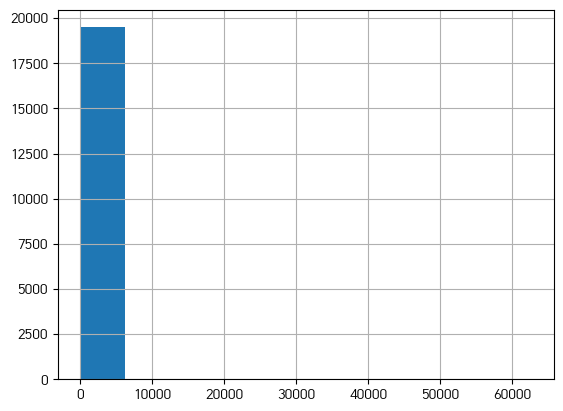

In [111]:
train_na_1st_notNA['Existing_EMI'].hist()

In [110]:
train_na_1st_notNA['Existing_EMI'].value_counts()

0.0       14300
500.0       510
400.0       293
1000.0      268
300.0       235
          ...  
644.3         1
185.9         1
432.7         1
158.9         1
754.7         1
Name: Existing_EMI, Length: 1270, dtype: int64

count unique         top   freq        ÎπÑÏú®
Gender                               19517      2        Male  16943  0.868115
City_Code                            19517    488      C10002   2883  0.147717
City_Category                        19517      3           A  14684   0.75237
Employer_Code                        19517  12549  COM0000002    172  0.008813
Employer_Category1                   19517      3           A   8698  0.445663
Employer_Category2                   19517      4        four  16698  0.855562
Customer_Existing_Primary_Bank_Code  19517     51        B001   4806  0.246247
Primary_Bank_Type                    19517      2           P  13103  0.671363
Contacted                            19517      1           Y  19517       1.0
Source                               19517     23        S122   7586  0.388687
Source_Category                      19517      6           B   7851  0.402265
Approved                             19517      2           0  19060  0.976585

In [ ]:
#Îã®ÏúÑÍ∞Ä Îã§Î•∏ Ïª¨ÎüºÎì§Ïù¥ ÏÑûÏó¨ÏûàÎäîÎç∞ 
#Ïù¥Í±∏ Ïó∞ÏÜçÌòï Ïª¨ÎüºÎì§ Ï†ÑÏ≤¥Î•º ÎåÄÏÉÅÏúºÎ°ú Î≥ÄÌôòÏùÑ Ìï¥ÏïºÌïòÎäîÍ∞Ä 
# 

In [ ]:
#Í∞Å Î≥ÄÏàòÎ≥Ñ Loan_AmountÏôÄÏùò Í¥ÄÍ≥Ñ ÌôïÏù∏ 
#Ïù¥ ÌïÑÏöîÌïúÍ∞Ä??
#anovaÍ≤ÄÏ†ïÏù¥ ÌïÑÏöî??


In [ ]:
set(obj_col)-set(['City_Code','Employer_Code', 'Customer_Existing_Primary_Bank_Code'])

In [143]:
#train_na_1st_notNA[train_na_1st_notNA.columns[train_na_1st_notNA.dtypes.map(lambda x: x=='object')]].describe().transpose()
obj_col= train_na_1st_notNA[[c for c in list(col)  if train_na_1st_notNA[c].dtype =='object']]
obj_col

TypeError: 'int' object is not iterable

In [ ]:
#objectÌòï Ïª¨ÎüºÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏ 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(train, ['Gender', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()

In [ ]:
#https://challenge.tistory.com/43
#Îã§Ï§ë ÏÑ†ÌòïÌöåÍ∑ÄÎäî Ï∞®ÏàòÎ•º ÎÜíÏó¨ÏÑú ÎßåÎìúÎäî ÏãùÏù¥ÎØÄÎ°ú 

#ÏßÅÏÑ†Ïùò Í¥ÄÍ≥ÑÎäî Í∞Å Ï∞®ÏõêÏóêÏÑúÎßå ÏÑ±Î¶ΩÌïòÍ≥† Ï†ÑÏ≤¥Ï†ÅÏù∏ Í¥ÄÍ≥ÑÎ•º ÎëêÍ≥† Î¥§ÏùÑ Îïê ÏßÅÏÑ†Ïù¥ ÏïÑÎãàÎã§ 

#ÌöåÍ∑ÄÍ≥ÑÏàòÎ°ú ÏùòÎØ∏Î•º ÎèÑÏ∂úÌï¥ÏïºÌï† Îïå Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ ÏàòÌñâ 
#ÏµúÏÜåÏûîÏ∞®Í∏∞Ïö∏Í∏∞ÎèÑ y/xÏùò Í∏∞Ïö∏Í∏∞ Ïó∞ÏÇ∞ ÌèâÍ∑†ÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑÎã§.
#Îî∞ÎùºÏÑú xÏùò Ïä§ÏºÄÏùºÏù¥ ÌÅ¨Î©¥ ÌÅ¥ÏàòÎ°ù ÌöåÍ∑ÄÍ≥ÑÏàòÎäî ÎÇÆÍ≤å Ï∏°Ï†ïÎêòÏñ¥ Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÎã§Í≥† ÌèâÍ∞ÄÎê† Í≤ÉÏù¥Îã§, 

#ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞Å Î≥ÄÏàòÎì§Ïùò Îã®ÏúÑÍ∞Ä Îã§Î•¥ÎØÄÎ°ú Îã§Î•∏ Îã®ÏúÑÎ•º ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï¥ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌïúÎã§. 

In [ ]:
#Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏ 
train_na_1st_notNA

In [ ]:
#train_Ïñ¥Ï©åÍ≥† Ï†ÄÏ©åÍ≥† Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Employer_Category2Í∞Ä floatÌòïÏãùÏù∏Îç∞ Ïù¥Í±∏ objectÌôî ÌñàÏùåÏóêÎèÑ 
#Í≥ÑÏÇ∞Ïù¥ ÎêòÎäî Í≤ÉÏúºÎ°ú Î¥êÏÑú 
#intÌòïÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† floatÌòïÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÎäîÍ≤å ÎßûÎäîÍ≤å ÏïÑÎãåÍ∞Ä Ïã∂Îã§. 
#Ï∞∏Í≥† Î∂ÄÌÉÅ 

# PythonÏùò Seaborn ÎùºÏù¥Î∏åÎü¨Î¶¨Ïóê ÏûàÎäî 'sns.pairplot' Ìï®ÏàòÎäî Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏù¥ Í∞ùÏ≤¥Î°ú Î≥ÄÍ≤ΩÎêòÎçîÎùºÎèÑ ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÜåÏàòÏ†êÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïà´Ïûê(Î∂ÄÎèô ÏÜåÏàòÏ†ê)Î°ú ÌëúÏãúÌï©ÎãàÎã§. 
#Îã§Î•∏ ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú SeabornÏùÄ Î≥ÄÏàòÏùò Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ Ìï¥ÏÑùÌïòÏó¨ ÌîåÎ°Ø Î∞©Î≤ïÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§.
# Îç∞Ïù¥ÌÑ∞ Ïú†ÌòïÏùÑ "Í∞úÏ≤¥"Î°ú Î≥ÄÍ≤ΩÌïòÎ©¥ Î≥ÄÏàòÍ∞Ä ÌëúÏãúÎêòÎäî Î∞©ÏãùÏóê ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏßÄÎßå Îç∞Ïù¥ÌÑ∞Ïùò Í∏∞Î≥∏ ÌäπÏÑ±ÏùÄ Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÏäµÎãàÎã§. 

In [ ]:
#Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ Î∂ÑÏÑù 
#Í∞Å Î≥ÄÏàòÎì§Ïùò Ï¢ÖÎ•òÎ•º ÌååÏïÖÌïúÎã§. 
#ÎÑàÎ¨¥ ÎßéÏùÄ Ï¢ÖÎ•òÎäî Í≥ÑÏÇ∞ÌïòÎäîÎç∞ Ïñ¥Î†§ÏõÄÏùÑ ÏïºÍ∏∞Ìï¥ÏÑú Í∑∏Îü∞Í∞Ä?
#Íµ¨Ï≤¥Ï†ÅÏù∏ Ïù¥Ïú†Í∞Ä ÌïÑÏöî


In [ ]:
#Ï¢ÖÏÜçÎ≥ÄÏàòÏùò ÏïÑÏõÉÎùºÏù¥Ïñ¥ +

In [30]:
col

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Source_Category',
 'Var1',
 'age'}

In [56]:
mr

intercept  age  Existing_EMI  Monthly_Income  Var1
1              1   29           0.0          3500.0    10
6              1   43           0.0          7500.0    10
7              1   25           0.0          3000.0     0
8              1   39           0.0          2500.0     7
10             1   32         460.0          2700.0     7
...          ...  ...           ...             ...   ...
69695          1   30           0.0          1500.0     2
69703          1   34           0.0          3500.0     7
69704          1   29        3400.0         13300.0    10
69706          1   30           0.0          4600.0    10
69710          1   24           0.0          1600.0     2

[19517 rows x 5 columns]

In [ ]:

#https://m.blog.naver.com/shoutjoy/221956655869
#Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù(linear)
#Îã§Ìï≠ÌöåÍ∑ÄÎ∂ÑÏÑù(Polynomial)

In [ ]:
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏùòÍ∞ÄÏßÄ Í∞ÄÏ†ïÏùÑ ÌÜµÌï¥ Î∂ÑÏÑùÎ™®Îç∏ÏùÑ Ï°∞Ï†ï  
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html



In [59]:
#https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

#https://pythonfordatascienceorg.wordpress.com/linear-regression-python/
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt


In [60]:
pd.get_dummies(train_na_1st_notNA[list(col)+['Loan_Amount']], drop_first=True)

{'City_Category',
 'City_Code',
 'Contacted',
 'Customer_Existing_Primary_Bank_Code',
 'Employer_Category1',
 'Employer_Code',
 'Existing_EMI',
 'Gender',
 'Monthly_Income',
 'Primary_Bank_Type',
 'Source',
 'Source_Category',
 'Var1',
 'age'}

In [ ]:
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏ 
#Ïó∞ÏÇ∞ Í≤∞Í≥ºÍ∞Ä ÏïàÎÇòÏò¥ 
pd.get_dummies(train_na_1st_notNA[list(col)+['Loan_Amount']], drop_first=True).corr()

In [ ]:
#ÎèÖÎ¶ΩÏÑ± ÌôïÏù∏ 

#durbin_watson
#0ÏóêÏÑú 4ÏÇ¨Ïù¥Ïùò Í∞íÏù¥ ÎÇòÏò§ÎäîÎç∞ 
#0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎåÄÌïú Í≤ÉÏù¥Í≥† 4Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎåÄÌïú Í≤ÉÏù¥Îã§.
#2Ïóê Í∞ÄÍπåÏö¥ Í≤ÉÏù¥ Ïù¥ÏÉÅÏ†ÅÏù∏ Í∞íÏù¥Îã§.. 
mr_model = 
statsmodels.stats.stattools.durbin_watson(mr_model.resid)

In [ ]:
#https://pythonfordatascienceorg.wordpress.com/linear-regression-python/

#Ï†ïÍ∑úÏÑ± ÌôïÏù∏ 
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sm.jarque_bera(mr_model.resid)
#zipÏùÄ Í∞Å Î¶¨Ïä§Ìä∏Ïùò ÏúÑÏπòÍ∞Ä ÏùºÏπòÌïòÎäî Í∞íÎì§ÏùÑ Î¨∂Ïñ¥ÏÑú Î∞òÌôòÌï¥Ï§ÄÎã§.
lzip(name, test)
#ÏòàÏãú Í≤∞Í≥ºÎ°úÎäî ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ±ÏùÑ ÏúÑÎ∞∞ÌïúÎã§Í≥† ÎÇòÏò¥ 

#Î°úÍ∑∏Î≥ÄÌôòÌï¥ÏÑú ÌôïÏù∏ 
df[ 'charges_log' ]  =  np . log(df[ 'Ï¢ÖÏÜçÎ≥ÄÏàò' ]) 
df[ 'ÏöîÍ∏à_Î°úÍ∑∏' ] . plot(kind = 'hist' ,  
                       title =  'Î≥¥ÌóòÎ£å Î∂ÑÎ∞∞ Î°úÍ∑∏' )

In [ ]:
#Ï†ïÍ∑úÏÑ± Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ 
#qqplot
stats.probplot(mr_model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

#Saving plot as a png
#plt.savefig("Model1_Resid_qqplot.png")

In [ ]:
#Îì±Î∂ÑÏÇ∞ÏÑ± 
#ÏûîÏ∞®ÎèÑ,, ÏÇ∞Ï†êÎèÑ(ÏõêÎøîÎ™®ÏñëÏù¥ Ï°¥Ïû¨ÌïòÎ©¥ Ïù¥Î∂ÑÏÇ∞ÏÑ± Ï°¥Ïû¨), Bruesch-Pagan, Cook-Weisberg Í≤ÄÏ†ï ÎòêÎäî White Í∞ôÏùÄ ÌÜµÍ≥Ñ Í≤ÄÏ†ï ÏÇ¨Ïö© 
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)
#p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÍ≤å ÎÇòÏò§Î©¥ Ïù¥Î∂ÑÏÇ∞ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïúÎã§Îäî ÏùòÎØ∏Ïù¥Îã§.. 
#

In [58]:
#Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä 
#Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏ÌïòÍ≥† ÏÑ†ÌòïÌöåÍ∑Ä 
#https://kkokkilkon.tistory.com/175
mr= train_na_1st_notNA[[c for c in list(col)  if train_na_1st_notNA[c].dtype !='object']]
#0Î≤àÏß∏Ïóê interceptÎùºÎäî Ïª¨ÎüºÏùÑ ÎÑ£ÎäîÎã§. ÎÑ£ÎäîÍ∞íÏùÄ mrÏù¥ÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞Ïùò 1Î°ú Îêú Î¶¨Ïä§Ìä∏Ïù¥Îã§.
#Ï†àÌé∏ 1ÏùÑ ÏßÄÏ†ïÌï¥Ï§Ä Ïù¥Ïú†Îäî??
mr.insert(0, 'intercept', [1]*len(mr))

mr_ols = sm.OLS(train_na_1st_notNA['Loan_Amount'], mr.iloc[:,1:])
results = mr_ols.fit()
results.summary()
#Í∞Å Î≥ÄÏàòÏùò p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Amount   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                              9424.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:49:35   Log-Likelihood:                     -2.2686e+05
No. Observations:               19517   AIC:                                  4.537e+05
Df Residuals:                   19513   BIC:                                  4.538e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age              782.6847     13.128     59.617      0.000     756.952     808.418
Existing_EMI      -3.2956      0.271    -12.153      0.000      -3.827      -2.764
Monthly_Income     0.0034      0.001      4.911      0.000       0.002       0.005
Var1            2449.0334     62.744     39.032      0.000    2326.050    2572.016
==============================================================================
Omnibus:                     8026.639   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45607.284
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                       9.447   Cond. No.                     9.19e+04
==============================================================================

Notes:
[1] R¬≤ is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
https://brunch.co.kr/@minnation/3388

In [ ]:
#https://topo314.tistory.com/62
Ï†ÅÌï©Ìïú ÌöåÍ∑ÄÎ™®Îç∏Ïù¥ Ïûò ÎßåÎì§Ïñ¥ÏßÑ Î™®Îç∏Ïù∏ÏßÄ ÏßÑÎã®Ïù¥ ÌïÑÏöîÌïòÎã§. 
Îî∞ÎùºÏÑú Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù, Îã§Ìï≠ÌöåÍ∑ÄÎ∂ÑÏÑù Î™®Îëê ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í∞ÄÏ†ïÏùÑ Îî∞Î•¥ÎäîÏßÄ ÌôïÏù∏Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§. 
Îëò Îã§ SSE(ÏûîÏ∞®Ï†úÍ≥±Ìï©)Ïù¥ ÏµúÏÜåÌôîÎêòÎèÑÎ°ù ÌöåÍ∑ÄÍ≥ÑÏàòÎ•º Ï∂îÏ†ïÌïúÎã§. 

Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú ÏûîÏ∞®Í∞Ä Í∞ÄÏ†ïÏóê ÏúÑÎ∞∞Îêú Í≤ΩÏö∞
-YÎ•º Î≥ÄÌôò(log, root Îì±)
-Ïù¥ÏÉÅÏπò Ï†úÍ±∞
-Îã§Ìï≠ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏÇ¨Ïö©ÌïúÎã§. 

Îã§Ìï≠ÌöåÍ∑ÄÎ∂ÑÏÑùÏù¥ ÌïÑÏöîÌïú Í≤ΩÏö∞ 
ÎèÖÎ¶ΩÎ≥ÄÏàò XÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò YÍ∞Ä ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÏùº Îïå(ÏÇ∞Ï†êÎèÑÎ•º Î≥¥Í≥† ÌåêÎã®)
ÏûîÏ∞®ÎèÑÎ•º Î≥¥Í≥† ÏÑ∏Í∞ÄÏßÄ Í∞ÄÏ†ï(ÌèâÍ∑†Ïù¥0Î∂ÑÏÇ∞Ïù¥ sigma^2Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§, YÍ∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•∏Îã§, XÏôÄ YÍ∞Ä ÏÑ†ÌòïÍ¥ÄÍ≥ÑÏù¥Îã§.)

Îã§Ìï≠ÌöåÍ∑Ä Ï†ÅÌï©
ÏùºÎ∞òÏ†ÅÏúºÎ°ú 2Ï∞®Ìï≠Îßå ÏûàÎäî Î™®Îç∏ ÏÇ¨Ïö©
-Í∏∞Ï°¥Î≥ÄÏàò+Ïù¥Ï∞®Ìï≠ Î™®Îç∏ÏùÄ Í≥ºÏ†ÅÌï©Ïù¥ Ïã¨Ìï¥ÏßÄÍ≥† Î≥ÄÏàòÍ∞Ñ correlationÍ≥º Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ Ïª§ÏßàÏàò ÏûàÎã§. 
-Ìï≠Ïù¥ Ï∂îÍ∞ÄÎê†ÏàòÎ°ù Í≥ºÏ†ÅÌï©Ïù¥ Ïûò ÏùºÏñ¥ÎÇòÎØÄÎ°ú 3Ï∞®Ìï≠Î∂ÄÌÑ∞Îäî Ïã†Ï§ëÌïòÍ≤å 

ÌöåÍ∑ÄÍ≥ÑÏàò Ï∂ïÏÜåÎ≤ï
ridge, lasso, elastic net 

ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóê ÎåÄÌïú ÌÜµÍ≥ÑÏ†Å Ïú†ÏùòÏÑ±ÏùÄ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞íÏúº ÏñºÎßàÎÇò ÎØøÏùÑ Ïàò ÏûàÎäîÏßÄÎ•º ÏïåÎ†§Ï§Ñ Îøê ÏûÑÏÉÅÏ†Å Ï§ëÏöîÏÑ±ÏùÑ ÏùòÎØ∏ÌïòÏßÄ ÏïäÎäîÎã§.
Í≤∞Ï†ïÍ≥ÑÏàòÎäî ÌïòÎÇòÍ∞íÏùò Î≥ÄÎèôÏù¥ Îã§Î•∏ Í∞íÏùò Î≥ÄÎèôÏóê ÏñºÎßàÎÇò Í¥ÄÎ†®Ïù¥ ÏûàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ∏Îã§. 

Î™®Îëê Ïó∞ÏÜçÎ≥ÄÏàòÏù∏ Í≤ΩÏö∞ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÎ∂ÑÏÑù
ÏµúÏÜå ÌïòÎÇòÏùò Î≥ÄÏàòÍ∞Ä ÏÑúÏó¥(ÏàúÏÑúÌòï)Î≥ÄÏàòÏù∏ Í≤ΩÏö∞ Ïä§ÌîºÏñ¥Îßå Î∂ÑÏÑù 
Îã§Î•∏ Î≥ÄÏàòÎì§ÏùÑ ÌÜµÏ†úÌïòÍ≥† Î≥ÄÏàòÎì§Ïùò ÏÑ†ÌòïÏ†Å Í¥ÄÎ†®ÏÑ±ÏùÑ Î≥¥Îäî Í≤ÉÏù¥ Ìé∏ÏÉÅÍ¥ÄÎ∂ÑÏÑù
ÏõêÏù∏Ïùò Î≥ÄÌôîÍ∞Ä ÏñºÎßàÎÇò Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ Î≥¥Îäî Í≤ÉÏù¥ ÌöåÍ∑ÄÎ∂ÑÏÑù 


In [ ]:
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏ†ÑÏóê Ï†ÑÏ≤¥ Î≥ÄÏàòÎ•º ÎåÄÏÉÅÏúºÎ°ú ÏÑ†ÌòïÏÑ±ÏùÑ Î≥∏Îã§.
#ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïúÎã§. 

#ÏùòÎ¨∏
ÎçîÎØ∏Î≥ÄÏàòÎ•º ÎëêÍ≥† ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î†§ÏÑú Î≥¥ÎäîÍ±¥Í∞Ä
ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏Ìï† ÎïåÏóêÎäî ÎçîÎØ∏Î≥ÄÏàòÎ•º ÎåÄÏÉÅÏúºÎ°úÎèÑ Î≥¥ÎäîÍ≤å ÎßûÎäîÍ∞Ä 

In [ ]:
#Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏(Multiple Linear Regression)Í≥º Îã§Ìï≠ÌöåÍ∑ÄÎ™®Îç∏(Polynomial Regression)ÏùÑ Î™®Îëê Í≥†Î†§ÌïúÎã§.
#Îã§Ï§ë(Ïó¨Îü¨ feature)//Îã§Ìï≠(Í≥°ÏÑ† Í∑∏ÎûòÌîÑ(Ïó¨Îü¨ ÎèÖÎ¶ΩÎ≥ÄÏàò))
#Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®ÌòïÏùÑ ÌôúÏö©Ìï† ÎïåÎäî Îã§ÏùåÏùò ÏßàÎ¨∏Îì§Ïóê Í¥ÄÏã¨ÏùÑ Îë°ÎãàÎã§.
#ÏÑ§Î™ÖÎ≥ÄÏàòÎì§ ùëã_1, ‚Ä¶, ùëã_ùëù Ï§ë Ï†ÅÏñ¥ÎèÑ ÌïòÎÇòÎäî Î∞òÏùëÎ≥ÄÏàòÎ•º ÏòàÏ∏°ÌïòÎäî Îç∞ Ïú†Ïö©ÌïúÍ∞Ä?
#YÎ•º ÏÑ§Î™ÖÌïòÎäî Îç∞ Î™®Îì† ÏÑ§Î™ÖÎ≥ÄÏàòÎì§Ïù¥ ÎèÑÏõÄÏù¥ ÎêòÎäîÍ∞Ä? ÎòêÎäî ÏÑ§Î™ÖÎ≥ÄÏàòÎì§Ïùò ÏùºÎ∂ÄÎßåÏù¥ Ïú†Ïö©ÌïúÍ∞Ä?
#Î™®Îç∏ÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê ÏñºÎßàÎÇò Ïûò ÎßûÎäîÍ∞Ä?
#Ï£ºÏñ¥ÏßÑ ÏÑ§Î™ÖÎ≥ÄÏàò Í∞íÎì§Ïóê ÎåÄÌï¥ Ïñ¥Îñ§ Î∞òÏùëÎ≥ÄÏàò Í∞íÏùÑ ÏòàÏ∏°Ìï¥Ïïº ÌïòÍ≥† Í∑∏ ÏòàÏ∏°ÏùÄ ÏñºÎßàÎÇò Ï†ïÌôïÌïúÍ∞Ä?


In [ ]:
Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑ÄÎ™®Îç∏ÏóêÎäî OLS(ÏùºÎ∞òÏµúÏÜåÏ†úÍ≥±)ÎßêÍ≥†ÎèÑ WLS(Í∞ÄÏ§ë ÏµúÏÜå Ï†úÍ≥±), GLS(ÏùºÎ∞òÌôîÎêú ÏµúÏÜåÏ†úÍ≥±)
#https://velog.io/@ddangchani/%EB%94%B0%EB%A6%89%EC%9D%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0-2-Linear-Regression

In [ ]:
#Î≤îÏ£ºÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï Ï¢ÖÏÜçÎ≥ÄÏàòÏùò Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏ (ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò)
#ÏûêÎÖÄÏú†Î¨¥ÏôÄ ÎÇòÏù¥Ïùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÄ Ïù¥Ïó∞ÏÉÅÍ¥Ä(biserial correlation)ÏúºÎ°ú Î∂ÑÏÑù 
#ÍµêÏ∞®Î∂ÑÏÑùÌï¥ÏÑú Ïπ¥Ïù¥Ï†úÍ≥± ÌïòÎ©¥ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Ïù¥Î†áÍ≤å ÎÇòÏò¥ 
#Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò phi, cramer's V

In [ ]:
#https://laoonlee.tistory.com/5
#Ï†ÑÏ≤¥ Î≥ÄÏàò Ìè¨Ìï®Ìïú Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù 
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò Í∞ÄÏ†ï(ÏÑ†ÌòïÏÑ±, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ±, Ï†ïÍ∑úÏÑ±, //Îã§Ï§ëÍ≥µÏÑ†ÏÑ±)
#ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ±: ÏûîÏ∞®Îì§Ïùò Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨ qqplot, shapiro-wilk, kolmogolov-smirnov, jarque-bara 
#Ïò§Ï∞®Ìï≠Ïùò ÎèÖÎ¶ΩÏÑ±:ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ Í∞Ñ ÌÜµÍ≥ÑÏ†Å ÎèÖÎ¶ΩÏÑ± residual plot, durbin-watson, breusch-godfre's LS test, ACF
#ÏÑ†ÌòïÏÑ±: Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÏÑ†ÌòïÍ¥ÄÍ≥Ñ
#Îì±Î∂ÑÏÇ∞ÏÑ±: Ïò§Ï∞®Ïùò Î∂ÑÏÇ∞ ÏùºÏ†ï residual plot, brown-forsythe, breusch-pagan

#Í∑∏ÎûòÌîÑ Î™®ÏñëÏóê Îî∞Îùº Ï†ïÍ∑úÌôîÎ•º Îã§Î•¥Í≤å ÌïòÎäîÎç∞ 

In [ ]:
#Î≥ÄÏàò ÏùºÎ∂ÄÍ∞Ä ÏÑ†ÌòïÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏùÑÍ≤ΩÏö∞
#//ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú Ï§ëÏöîÌïú Í∞ÄÏ†ïÏúºÎ°ú ÎπÑÏÑ†Ìòï ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÎäî Ìï¥ÎãπÌïòÏßÄ ÏïäÎäîÎã§. 
#ÏÉàÎ°úÏö¥ Î≥ÄÏàòÏ∂îÍ∞Ä
#Î°úÍ∑∏,ÏßÄÏàò,Î£®Ìä∏ Îì± Î≥ÄÏàòÎ≥ÄÌôò(Î≥ÄÌôòÌïòÍ≥† ÎÇú Îí§ÏóêÎäî ÏõêÎûòÎåÄÎ°ú ÎèåÎ†§ÎÜîÏïºÌïúÎã§.)
#ÏÑ†ÌòïÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäî Î≥ÄÏàò Ï†úÍ±∞ 
#ÏÑ†Ìòï ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ ÎßåÎì§Í≥† Î≥ÄÏàòÏÑ†ÌÉùÎ≤ï ÏÇ¨Ïö© 

#Î≥ÄÏàò ÏùºÎ∂ÄÍ∞Ä ÎèÖÎ¶ΩÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÎäîÍ≤ΩÏö∞
#//ÎèÖÎ¶ΩÏÑ±ÏùÄ Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú Ï§ëÏöîÌïú Í∏∞Î≥∏Í∞ÄÏ†ïÏúºÎ°ú Îã®Ïàú ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑúÎäî Ìï¥ÎãπÌïòÏßÄ ÏïäÏùå
#//Ï£ºÎ°ú ÏãúÍ≥ÑÏó¥ ÏûêÎ£åÏóêÏÑúÎßå ÎèÖÎ¶ΩÏÑ±ÏùÑ Í∞ÄÏ†ï?? 
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ ÏùºÏúºÌÇ§Îäî Î≥ÄÏàòÏ†úÍ±∞(ex stepwise)
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ ÏùºÏúºÌÇ§Îäî Î≥ÄÏàòÎ•º Îã§Î•∏ Î≥ÄÏàòÎ°ú ÏπòÌôò 

#Îì±Î∂ÑÏÇ∞ÏÑ±ÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞ 
#Weight least square, GLS regression




In [ ]:
dw_test_statistic, _ = sm.stats.stattools.durbin_watson(model.resid)
print(f'Durbin-Watson test statistic: {dw_test_statistic}')

In [22]:
#object Ïª¨Îüº ÎçîÎØ∏Ìôî ÌïÑÏöî 
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ drop_first=True ÏòµÏÖòÏùÑ Ï§ÄÎã§. 
encoding_dummy = pd.get_dummies(train_na_1st_notNA[list(col)], drop_first=True)

In [ ]:
encoding_dummy.corr()

In [ ]:
sns.heatmap(encoding_dummy, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [93]:
x

const  Var1  Monthly_Income  Existing_EMI  age  City_Code_C10002  \
1        1.0    10          3500.0           0.0   29                 0   
6        1.0    10          7500.0           0.0   43                 0   
7        1.0     0          3000.0           0.0   25                 0   
8        1.0     7          2500.0           0.0   39                 0   
10       1.0     7          2700.0         460.0   32                 0   
...      ...   ...             ...           ...  ...               ...   
69695    1.0     2          1500.0           0.0   30                 0   
69703    1.0     7          3500.0           0.0   34                 0   
69704    1.0    10         13300.0        3400.0   29                 0   
69706    1.0    10          4600.0           0.0   30                 1   
69710    1.0     2          1600.0           0.0   24                 0   

       City_Code_C10003  City_Code_C10004  City_Code_C10005  City_Code_C10006  \
1                     1                 0                 0                 0   
6                     0                 0                 0                 0   
7                     1                 0                 0                 0   
8                     1                 0                 0                 0   
10                    0                 0                 0                 0   
...                 ...               ...               ...               ...   
69695                 0                 0                 0                 0   
69703                 0                 0                 0                 1   
69704                 0                 0                 0                 0   
69706                 0                 0                 0                 0   
69710                 0                 0                 0                 0   

       ...  Customer_Existing_Primary_Bank_Code_B042  \
1      ...                                         0   
6      ...                                         0   
7      ...                                         0   
8      ...                                         0   
10     ...                                         0   
...    ...                                       ...   
69695  ...                                         0   
69703  ...                                         0   
69704  ...                                         0   
69706  ...                                         0   
69710  ...                                         0   

       Customer_Existing_Primary_Bank_Code_B043  \
1                                             0   
6                                             0   
7                                             0   
8                                             0   
10                                            0   
...                                         ...   
69695                                         0   
69703                                         0   
69704                                         0   
69706                                         0   
69710                                         0   

       Customer_Existing_Primary_Bank_Code_B044  \
1                                             0   
6                                             0   
7                                             0   
8                                             0   
10                                            0   
...                                         ...   
69695                                         0   
69703                                         0   
69704                                         0   
69706                                         0   
69710                                         0   

       Customer_Existing_Primary_Bank_Code_B045  \
1                                             0   
6                                             0   
7                                             0   
8                             

In [ ]:
#Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù 
x=sm.add_constant(encoding_dummy)
y=train_na_1st_notNA['Loan_Amount']
model = sm.OLS(y,x).fit()
model.summary()
#ÌöåÍ∑ÄÎ∂ÑÏÑùÏãú 

City_Code Employer_Category2  Var1 Lead_Creation_Date  Monthly_Income  \
1        C10003                1.0    10         2016-07-04          3500.0   
6        C10022                4.0    10         2016-07-02          7500.0   
7        C10003                4.0     0         2016-07-03          3000.0   
8        C10003                4.0     7         2016-07-02          2500.0   
10       C10030                4.0     7         2016-07-09          2700.0   
...         ...                ...   ...                ...             ...   
69695    C10057                4.0     2         2016-09-30          1500.0   
69703    C10006                4.0     7         2016-09-30          3500.0   
69704    C10001                4.0    10         2016-09-30         13300.0   
69706    C10002                2.0    10         2016-09-30          4600.0   
69710    C10022                4.0     2         2016-09-30          1600.0   

      Source        DOB  Existing_EMI  Gender Employer_Category1  age  \
1       S122 1986-12-07           0.0    Male                  C   29   
6       S122 1973-03-28           0.0    Male                  B   43   
7       S133 1990-11-12           0.0  Female                  A   25   
8       S133 1977-03-03           0.0    Male                  A   39   
10      S133 1983-08-24         460.0    Male                  B   32   
...      ...        ...           ...     ...                ...  ...   
69695   S122 1985-11-13           0.0    Male                  A   30   
69703   S122 1982-05-31           0.0  Female                  A   34   
69704   S122 1986-10-14        3400.0    Male                  B   29   
69706   S122 1986-03-04           0.0    Male                  B   30   
69710   S122 1992-02-01           0.0  Female                  C   24   

      City_Category Primary_Bank_Type Contacted Source_Category Employer_Code  \
1                 A                 P         Y               G    COM0000002   
6                 B                 G         Y               C    COM0030526   
7                 A                 P         Y               B    COM0016738   
8                 A                 G         Y               B    COM0010626   
10                B                 G         Y               B    COM0002632   
...             ...               ...       ...             ...           ...   
69695             C                 G         Y               G    COM0041137   
69703             A                 P         Y               G    COM0030433   
69704             A                 P         Y               G    COM0011185   
69706             A                 P         Y               G    COM0000003   
69710             B                 P         Y               G    COM0013284   

      Customer_Existing_Primary_Bank_Code  
1                                    B002  
6                                    B003  
7                                    B006  
8                                    B017  
10                                   B003  
...                                   ...  
69695                                B003  
69703                                B004  
69704                                B005  
69706                                B001  
69710                                B030  

[19517 rows x 17 columns]

In [ ]:
#object Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 
train_na_1st_notNA.groupby(['Î≤îÏ£ºÌòïÎ≥ÄÏàò'])['Loan_Amount'].mean()

In [66]:
#Ïó∞ÏÜçÌòï Ïª¨Îüº 
chk_list = [i for i in train_na_1st_notNA.columns if train_na_1st_notNA[i].dtype in ['float64', 'int64']]
#corrÍ≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ ÏÇ≠Ï†ú 
chk_list.pop(-2)
chk_list

['Monthly_Income',
 'Existing_EMI',
 'Loan_Amount',
 'Loan_Period',
 'Interest_Rate',
 'EMI',
 'age']

In [ ]:
#Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í∏∞ ÏúÑÌïú ÏÇ¨Ï†ÑÎã®Í≥Ñ
#0Ïïà)Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í≥º Î≤îÏ£ºÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÎ•º Î™®Îëê Ìè¨Ìï®Ìï¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§. 
#1Ïïà)Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í≥º Ïó∞ÏÜçÌòï Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§.
#2Ïïà)Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàò 1Í∞úÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò 1Í∞úÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÌôïÏù∏Ìï¥Î≥∏Îã§.  
#3Ïïà)Ïù¥Ïñ¥ÏÑú ÏûëÏÑ± 


#Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ñ Ïó∞Í¥ÄÏÑ± ÌôïÏù∏  

In [ ]:
# Loan_Amount ÎåÄÏÉÅ Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ 

In [67]:
train_na_1st_NA[train_na_1st_NA['Loan_Amount'].isna()==True].isna().sum()
#Loan_AmountÍ∞Ä Í≤∞Ï∏°ÏπòÏù∏ ÌñâÏùÄ Loan_period, Interest_Rate, EMIÏª¨ÎüºÎèÑ Ï£ºÎ°ú Í≤∞Ï∏°ÏπòÏù∏Í≤ÉÏúºÎ°ú ÎÇòÏôîÎã§. 
#Îî∞ÎùºÏÑú ÏòàÏ∏°Î™®Îç∏ÏùÑ ÎßåÎì§Ïãú Interest_RateÏôÄ EMIÏª¨ÎüºÏùÑ ÏÇ≠Ï†úÌïòÍ≥† Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïúÎã§. 

ID                                         0
Gender                                     0
DOB                                        0
Lead_Creation_Date                         0
City_Code                                  0
City_Category                              0
Employer_Code                              0
Employer_Category1                         0
Employer_Category2                         0
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code        0
Primary_Bank_Type                          0
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                               0
Loan_Amount                            19858
Loan_Period                            19858
Interest_Rate                          19858
EMI                                    19858
Var1                                       0
Approved                                   0
age       

In [70]:
#Loan_period, Interest_Rate, EMI Ï†úÏô∏ 
chk_list0=chk_list
chk_list0.remove('Loan_Period')
chk_list0.remove('Interest_Rate')
chk_list0.remove('EMI')

ValueError: list.remove(x): x not in list

In [415]:
#ÏúÑÌóò
#sns.pairplot(train_na_1st_notNA[chk_list], corner=True)

In [69]:
#Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏ 


In [ ]:
#Ïó∞ÏÜçÌòï ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏

In [21]:
train_na_1st_notNA[chk_list0].corr()['Loan_Amount']
#Loan_AmountÏôÄÏùò Í¥ÄÍ≥Ñ
#Employer_Category2, Monthly_Income, Existing_EMI, Var1, ageÎäî ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Ïó∞Í¥ÄÏÑ±Ïù¥ Í±∞Ïùò ÏóÜÎã§.
#Laon_Period, Interest_Rate, Var1ÏùÄ ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.
#EMIÏôÄÎäî Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.

Employer_Category2   -0.054613
Monthly_Income        0.036990
Existing_EMI         -0.018633
Loan_Amount           1.000000
Var1                  0.261632
age                   0.111640
Name: Loan_Amount, dtype: float64

In [ ]:
#ÏÉÅÏãùÏ†ÅÏúºÎ°úÎèÑ ÎÇòÏù¥Í∞Ä Îì§ÏàòÎ°ù ÏûêÎÖÄÍ∞Ä ÏûàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÍ≤†Í≥†, Í∑∏ÎûòÏÑúÏù∏ÏßÄ ÏûêÎÖÄÏú†Î¨¥ÏôÄ ÎÇòÏù¥Î°ú ÍµêÏ∞®Î∂ÑÏÑùÏùÑ Ìï¥ÏÑú Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏùÑ Î≥¥Î©¥ ÌîºÏñ¥Ïä® Ïπ¥Ïù¥Ï†úÍ≥±Ïù¥ .000ÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å ÎÇòÏòµÎãàÎã§.
#ÏûêÎÖÄÏú†Î¨¥(ÏóÜÏùå = 1, ÏûàÏùå = 2)ÏôÄ ÎÇòÏù¥Î•º Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ°ú Î≥¥Î©¥ r = 762***Ïù¥ ÎÇòÏòµÎãàÎã§.
#Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Phi, Cramer's V Í≥ÑÏàòÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
#ÏûêÎÖÄÏú†Î¨¥(0/1)ÏôÄ ÎÇòÏù¥(Ïó∞ÏÜçÌòïÎ≥ÄÏàò)Ïùò ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÄ biserial correlation(Ïù¥Ïó∞ÏÉÅÍ¥Ä)ÏúºÎ°ú Î∂ÑÏÑùÌï©ÎãàÎã§. 
#Ïù¥Îïå Ïù¥ Í∞íÏùÄ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ Í∞íÏù¥ ÎèôÏùºÌïòÍ≤å ÎÇòÏò§ÎØÄÎ°ú Îëò ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî .823 ÏúºÎ°ú Î≥¥Î©¥ Îê©ÎãàÎã§. 

#http://www.statedu.com/index.php?mid=QnA&comment_srl=86023&category=0&listStyle=webzine&document_srl=280396

In [22]:
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏ 
#ÎèÖÎ¶Ω Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÍ≥†, Ï∂îÏ†ïÎüâÏùÑ Î∂ÑÏÑùÌïòÍ≥†Ïûê Ìï† Îïå Ï†úÍ±∞Ìï¥ÏïºÌï®
#!!!Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏúºÎ°ú Ïù∏Ìï¥ ÎèÖÎ¶Ω Î≥ÄÏàòÎì§ Í∞ÑÏóê ÎÜíÏùÄ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏúºÎ©¥, Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏùò Ìö®Í≥ºÎ•º Ï†ïÌôïÌïòÍ≤å Ï∂îÏ†ïÌïòÍ∏∞ Ïñ¥Î†µÏäµÎãàÎã§. Ïù¥Îäî ÌöåÍ∑Ä Í≥ÑÏàòÏùò Î∂ÄÏ†ïÌôïÏÑ±ÏúºÎ°ú Ïù¥Ïñ¥Ïßà Ïàò ÏûàÏäµÎãàÎã§

from statsmodels.stats.outliers_influence import variance_inflation_factor
#VIFÍ∏∞Ï§Ä 10

independent_vars = train_na_1st_notNA[chk_list0].drop('Loan_Amount', axis=1) 
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
vif_data
#age, Employer_Category2 VIFÍ∞Ä ÎÜíÏùÄ Í≤ÉÏúºÎ°ú ÎÇòÏôîÎã§.
#VIFÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú ÌïòÎÇòÏî© ÏóÜÏï†Î©¥ÏÑú Ïû¨ÌôïÏù∏

Variable        VIF
0  Employer_Category2  12.883700
1      Monthly_Income   1.000976
2        Existing_EMI   1.130462
3                Var1   4.363124
4                 age  16.388455

In [23]:
#2Ï∞® ÌôïÏù∏
independent_vars = train_na_1st_notNA[chk_list0].drop(['Loan_Amount', 'age'], axis=1) 
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars.columns
vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]
vif_data
#Employer_Category2ÏôÄ InterestÍ∞Ä Ïó¨Ï†ÑÌûà ÎÜíÏúºÎØÄÎ°ú Ïû¨ÌôïÏù∏

Variable       VIF
0  Employer_Category2  3.319024
1      Monthly_Income  1.000972
2        Existing_EMI  1.130358
3                Var1  3.464363

In [ ]:
#Î≤àÏô∏)
#Í≥µÎ∂ÑÏÇ∞ÏùÄ 2Í∞úÏùò ÌôïÎ•†Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÏ†ïÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í∞íÏù∏Îç∞, 
#ÎßåÏïΩ 2 Í∞úÏùò Î≥ÄÏàò Ï§ë ÌïòÎÇòÏùò Í∞íÏù¥ ÏÉÅÏäπÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïùº Îïå Îã§Î•∏ Í∞íÎèÑ ÏÉÅÏäπÌïòÎ©¥ Í≥µÎ∂ÑÏÇ∞Ïùò Í∞íÏùÄ ÏñëÏàò, Î∞òÎåÄÎ°ú Îã§Î•∏ Í∞íÏù¥ ÌïòÍ∞ïÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Î©¥ Í≥µÎ∂ÑÏÇ∞Ïùò Í∞íÏùÄ ÏùåÏàòÍ∞Ä ÎÇòÏòµÎãàÎã§.


Employer_Category2
PearsonRResult(statistic=-0.05461297661972415, pvalue=2.261363476395721e-14)


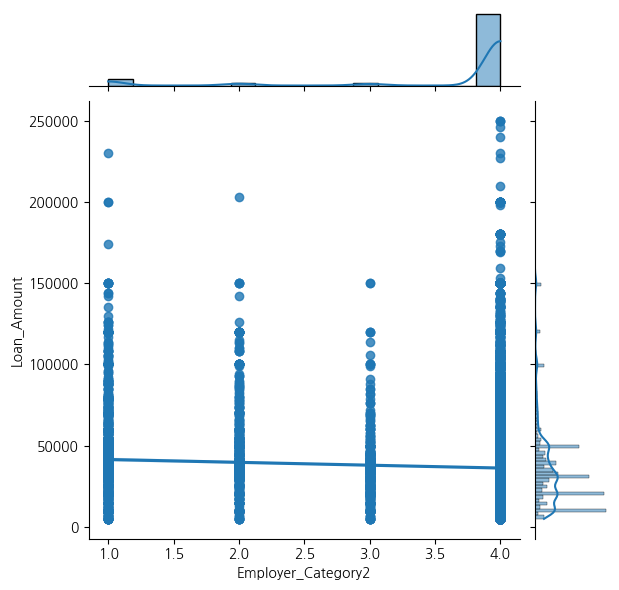

In [24]:
print(chk_list0[0])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[0]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[0], y='Loan_Amount', kind='reg')
#Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÏóê ÏûàÏßÄÎßå ÌÅ¨Í≤å ÏùòÎØ∏Í∞Ä ÏûàÏñ¥Î≥¥Ïù¥ÏßÑ ÏïäÎäîÎã§. 

In [416]:
#Ïò§ÎûòÍ±∏Î¶º Ï£ºÏùò 
#print(chk_list0[1])
#print(spst.pearsonr(train_na_1st_notNA[chk_list0[1]], train_na_1st_notNA['Loan_Amount']))
#sns.jointplot(data= train_na_1st_notNA, x=chk_list0[1], y='Loan_Amount', kind='reg')
#Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÏóê ÏûàÏßÄÎßå ÌÅ¨Í≤å ÏùòÎØ∏Í∞Ä ÏûàÏñ¥Î≥¥Ïù¥ÏßÑ ÏïäÎäîÎã§. 

Existing_EMI
PearsonRResult(statistic=-0.0186331156452038, pvalue=0.009236716693899286)


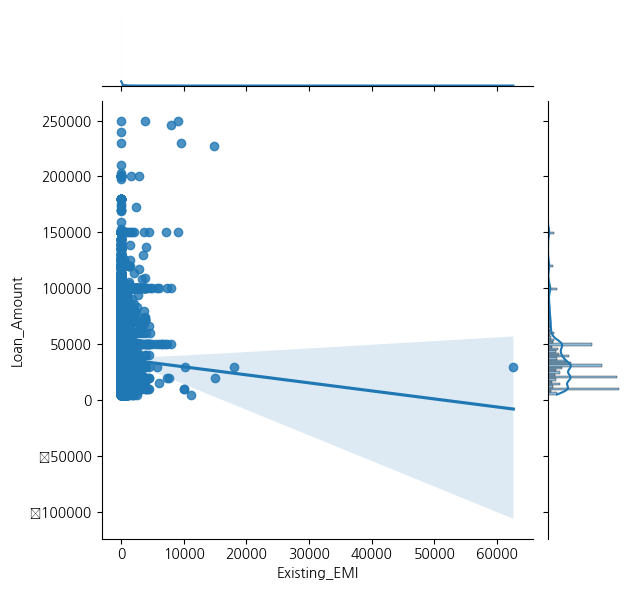

In [26]:
print(chk_list0[2])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[2]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[2], y='Loan_Amount', kind='reg')
#Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥ÑÏóê ÏûàÏßÄÎßå ÌÅ¨Í≤å ÏùòÎØ∏Í∞Ä ÏûàÏñ¥Î≥¥Ïù¥ÏßÑ ÏïäÎäîÎã§. 

Var1
PearsonRResult(statistic=0.2616318166320052, pvalue=7.285678647512292e-303)


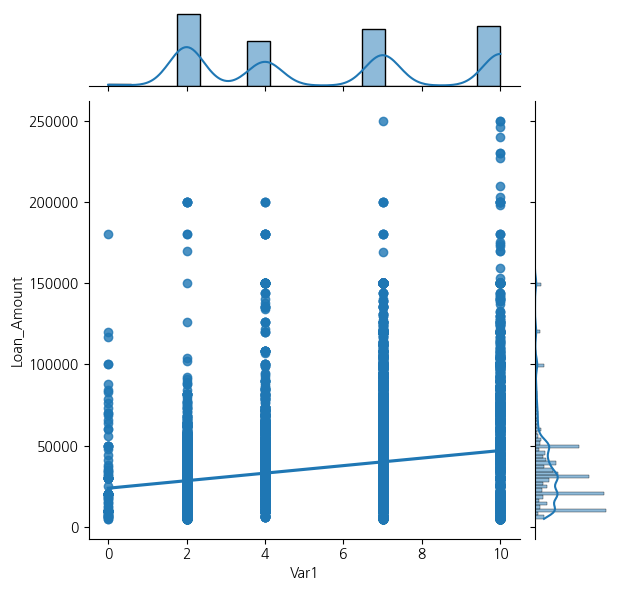

In [27]:
print(chk_list0[4])
print(spst.pearsonr(train_na_1st_notNA[chk_list0[4]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list0[4], y='Loan_Amount', kind='reg')
#Loan_PeriodÍ∞Ä Í∏∏ÏàòÎ°ù Loan_AmountÍ∞Ä Ïª§ÏßÑÎã§. 
#ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 

In [ ]:
#===ÏïÑÎãò 

Interest_Rate
PearsonRResult(statistic=-0.3100214524617286, pvalue=0.0)


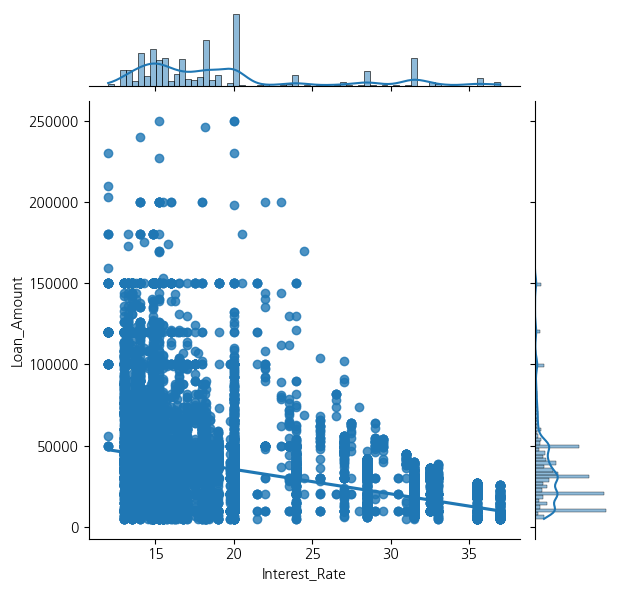

In [42]:
print(chk_list[5])
print(spst.pearsonr(train_na_1st_notNA[chk_list[5]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[5], y='Loan_Amount', kind='reg')
#Interest_RateÍ∞Ä ÎÇÆÏïÑÏßÄÎ©¥ÏÑú Loan_AmountÎèÑ ÏûëÏïÑÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. 
#ÏïΩÌïú ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 

EMI
PearsonRResult(statistic=0.9156135101708064, pvalue=0.0)


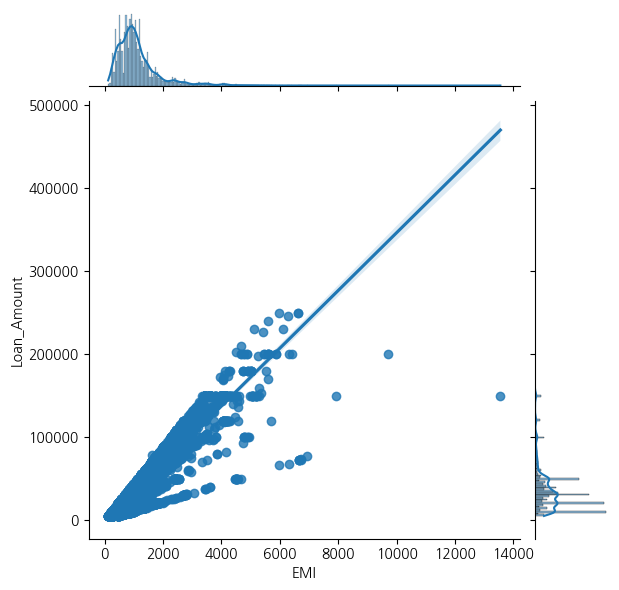

In [44]:
print(chk_list[6])
print(spst.pearsonr(train_na_1st_notNA[chk_list[6]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[6], y='Loan_Amount', kind='reg')
#EMIÍ∞Ä ÌÅ¥ÏàòÎ°ù Loan_AmountÍ∞Ä Ïª§ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.
#ÎåÄÎ∂ÄÎ∂ÑÏùò EMI(ÏõîÏÉÅÌôòÏï°+Ïù¥Ïûê)Îäî 2000Ïù¥ÌïòÎ°ú ÎÇòÌÉÄÎÇ¨Îã§. 
#Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 
#Îã®ÏàúÌûà EMIÎ•º ÌÜµÌï¥ Loan_AmountÎ•º Ï∂îÏ†ïÌï¥Î≥¥ÎäîÍ≤ÉÎèÑ Í≥†Î†§Ìï¥Î≥ºÎßåÌïúÍ≤É Í∞ôÎã§. 

Var1
PearsonRResult(statistic=0.2616318166320052, pvalue=7.285678647512292e-303)


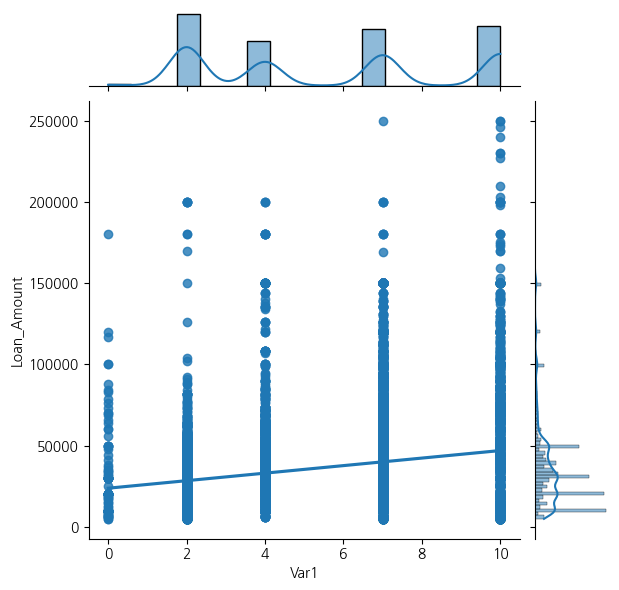

In [45]:
print(chk_list[7])
print(spst.pearsonr(train_na_1st_notNA[chk_list[7]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[7], y='Loan_Amount', kind='reg')
#Var1Ïù¥ Ïª§ÏßàÏàòÎ°ù Loan_AmountÍ∞Ä Ïª§ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. 

age
PearsonRResult(statistic=0.11164017168429352, pvalue=3.6265018402832765e-55)


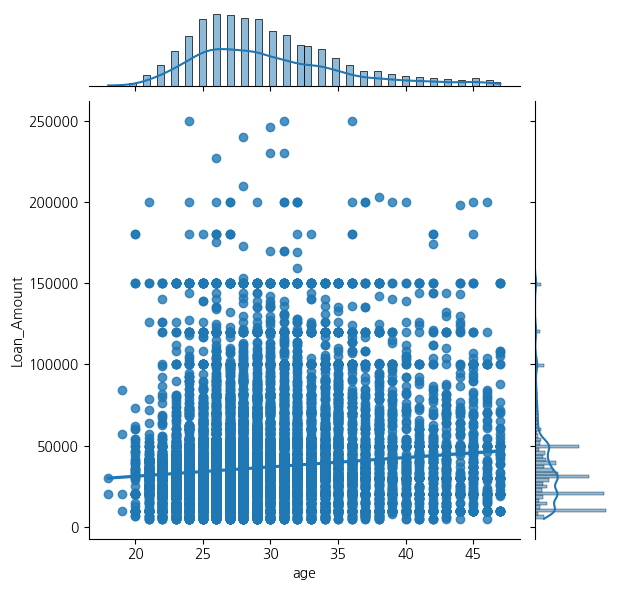

In [49]:
print(chk_list[9])
print(spst.pearsonr(train_na_1st_notNA[chk_list[9]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[9], y='Loan_Amount', kind='reg')
#20-30ÎåÄÏóêÏÑú Ï£ºÎ°ú ÎåÄÏ∂úÏùÑ Î∞õÏùÄ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. 
#Ïó∞Î†πÏù¥ ÎÜíÏùÑÏàòÎ°ù Loan_AmountÍ∞Ä Ïª§ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. 

PearsonRResult(statistic=0.3662531087437405, pvalue=0.0)


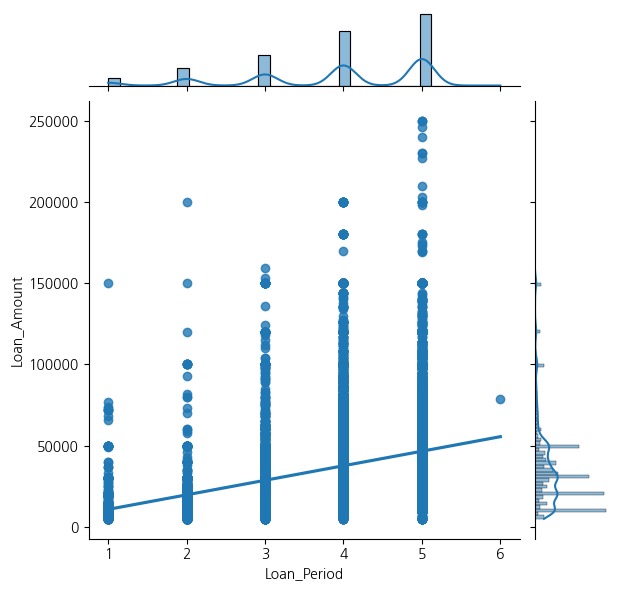

In [27]:
print(spst.pearsonr(train_na_1st_notNA[chk_list[4]], train_na_1st_notNA['Loan_Amount']))
sns.jointplot(data= train_na_1st_notNA, x=chk_list[4], y='Loan_Amount', kind='reg')
#Loan_PeriodÍ∞Ä Ïª§ÏßàÏàòÎ°ù Loan_AmountÍ∞Ä Ïª§ÏßÄÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§. 
#ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§. 

In [98]:
#Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù
#Î™®Îì† ÎèÖÎ¶ΩÎ≥ÄÏàò Ìè¨Ìï®
import pandas as pd
import statsmodels.api as sm

independent_vars = train_na_1st_notNA[chk_list].drop(['Loan_Amount'], axis=1) 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#Î™®Îç∏ ÏÑ§Î™ÖÎ†• 0.936 

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.556e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:            -2.0079e+05
No. Observations:               19517   AIC:                         4.016e+05
Df Residuals:                   19508   BIC:                         4.017e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.074e+04    466

In [97]:
#Îã§Ï§ëÌöåÍ∑ÄÎ∂ÑÏÑù
#Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Ïù¥ ÎÜíÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò Ï†úÍ±∞ 
import pandas as pd
import statsmodels.api as sm

independent_vars = train_na_1st_notNA[chk_list].drop(['Loan_Amount', 'age', 'Employer_Category2'], axis=1) 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#Î™®Îç∏ ÏÑ§Î™ÖÎ†• 0.936
#Îçî Ï†ÅÏùÄ Ïª¨ÎüºÏúºÎ°ú Í∞ôÏùÄ ÏÑ§Î™ÖÎ†•ÏùÑ Í∞ÄÏßÄÎäî Ìï¥Îãπ Î™®Îç∏Ïù¥ Îçî ÎÇòÏïÑÎ≥¥Ïù∏Îã§. 

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 4.734e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:19:13   Log-Likelihood:            -2.0081e+05
No. Observations:               19517   AIC:                         4.016e+05
Df Residuals:                   19510   BIC:                         4.017e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.952e+04    364.545    -53.

ID  Gender        DOB Lead_Creation_Date City_Code  \
0      APPC90493171225  Female 1979-07-23         2016-07-15    C10001   
2      APPE70289249423    Male 1982-12-10         2016-07-19    C10125   
3      APPF80273865537    Male 1989-01-30         2016-07-09    C10477   
4      APPG60994436641    Male 1985-04-19         2016-07-20    C10002   
5      APPI90914237819  Female 1988-12-23         2016-07-01    C10402   
...                ...     ...        ...                ...       ...   
69705  APPR50947529333    Male 1991-08-01         2016-09-30    C10002   
69707  APPT50870248519    Male 1991-03-03         2016-09-30    C10041   
69708  APPU90955789628  Female 1983-07-31         2016-09-30    C10006   
69709  APPV80989824738  Female 1971-01-27         2016-09-30    C10116   
69711  APPY50870035036    Male 1978-06-27         2016-09-30    C10002   

      City_Category Employer_Code Employer_Category1  Employer_Category2  \
0                 A    COM0044082                  A                 4.0   
2                 C    COM0005267                  C                 4.0   
3                 C    COM0004143                  A                 4.0   
4                 A    COM0001781                  A                 4.0   
5                 C    COM0007740                  A                 4.0   
...             ...           ...                ...                 ...   
69705             A    COM0000169                  A                 4.0   
69707             C    COM0000009                  A                 1.0   
69708             A    COM0000010                  A                 1.0   
69709             C    COM0045789                  A                 4.0   
69711             A    COM0000098                  C                 3.0   

       Monthly_Income  ... Source Source_Category Existing_EMI Loan_Amount  \
0              2000.0  ...   S122               G          0.0         NaN   
2              2250.0  ...   S143               B          0.0     45000.0   
3              3500.0  ...   S143               B          0.0     92000.0   
4             10000.0  ...   S134               B       2500.0     50000.0   
5              7000.0  ...   S133               B          0.0         NaN   
...               ...  ...    ...             ...          ...         ...   
69705          1500.0  ...   S122               G          0.0     24000.0   
69707          2400.0  ...   S122               G          0.0     30000.0   
69708          4900.0  ...   S122               G          0.0         NaN   
69709          7190.1  ...   S122               G       1450.0         NaN   
69711          9893.0  ...   S122               G       1366.0     80000.0   

      Loan_Period  Interest_Rate  EMI  Var1  Approved  age  
0             NaN            NaN  NaN     0         0   37  
2             4.0            NaN  NaN     0         0   33  
3             5.0            NaN  NaN     7         0   27  
4             2.0            NaN  NaN    10         0   31  
5             NaN            NaN  NaN     0         0   27  
...           ...            ...  ...   ...       ...  ...  
69705         4.0            NaN  NaN     2         0   25  
69707         3.0            NaN  NaN     2         0   25  
69708         NaN            NaN  NaN    10         0   33  
69709         NaN            NaN  NaN     7         0   45  
69711         5.0            NaN  NaN    10         0   38  

[37929 rows x 23 columns]

In [ ]:
#Î™®Îç∏Î°ú Í≤∞Ï∏°Ïπò ÏòàÏ∏° 
predictions = model.predict(independent_var)
predictions

In [100]:
#Îã®ÏàúÌöåÍ∑ÄÎ∂ÑÏÑù 
independent_vars = train_na_1st_notNA['EMI'] 
dependent_var = train_na_1st_notNA['Loan_Amount']

independent_vars = sm.add_constant(independent_vars)
model = sm.OLS(dependent_var, independent_vars).fit()
print(model.summary())
#Î™®Îç∏ ÏÑ§Î™ÖÎ†• 838

                            OLS Regression Results                            
Dep. Variable:            Loan_Amount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:23:39   Log-Likelihood:            -2.0981e+05
No. Observations:               19517   AIC:                         4.196e+05
Df Residuals:                   19515   BIC:                         4.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1717.6742    145.599    -11.797      0.0

In [ ]:
#Î™®Îç∏Î°ú Í≤∞Ï∏°Ïπò ÏòàÏ∏° 
predictions = model.predict(independent_var)
predictions

In [ ]:
#spst.pearsonr(boston['crim'], boston['medv'])
#sns.jointplot(boston['crim'], boston['medv'])

In [392]:
#Îç∞Ïù¥ÌÑ∞Ïùò Î∂àÍ∑†Ìòï ÌôïÏù∏
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=ko
#np.bincount(array)Îäî ÏûÖÎ†•Ìïú arrayÏùò ÏöîÏÜåÎ≥ÑÎ°ú Í∞ØÏàòÎ•º countÌï¥ÏÑú Î∞òÌôòÌïúÎã§. 
#ApprovedÍ∞Ä 0Ïù∏ Í∞íÏùÄ 58202Í∞ú 1Ïù∏ Í∞íÏùÄ 959Í∞ú 
neg, pos = np.bincount(train['Approved'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
#Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ Î≥¥ÏûÑ 

Examples:
    Total: 58202
    Positive: 959 (1.65% of total)



In [251]:
#testÏÖãÏóêÎèÑ ÎèôÏùºÌïòÍ≤å Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏ 
for i in test.columns:
    print(i, test[i].isna().sum(), f'--{(test[i].isna().sum()/len(test))*100}% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨')

ID 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Gender 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
DOB 3 --0.009987681859040518% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Lead_Creation_Date 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
City_Code 314 --1.0453773679129075% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
City_Category 314 --1.0453773679129075% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Employer_Code 1605 --5.343409794586677% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Employer_Category1 1605 --5.343409794586677% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Employer_Category2 1695 --5.643040250357892% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Monthly_Income 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Customer_Existing_Primary_Bank_Code 4037 --13.44009055498219% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Primary_Bank_Type 4037 --13.44009055498219% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Contacted 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Source 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Source_Category 0 --0.0% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Existing_EMI 32 --0.10653527316309885% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Loan_Amount 11871 --39.521257116223325% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Loan_Period 11871 --39.521257116223325% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
Interest_Rate 20385 --67.86629823218031% Í≤∞Ï∏°Ïπò Ï°¥Ïû¨
EMI 20385 --67.86629823218031% Í≤∞Ï

In [164]:
train['Lead_Creation_Date'].value_counts()
#Ï£º Îã®ÏúÑÎ°ú ÏûòÎùºÏÑú Ï†ÑÌôòÏú®ÏùÑ ÌôïÏù∏Ìï† ÏàòÎèÑ ÏûàÍ≥†, ÏõîÎã®ÏúÑÎ°ú ÏûòÎùºÏÑú Î≥º Ïàò ÏûàÎã§. 

2016-09-29    336
2016-08-22    324
2016-08-23    308
2016-08-17    304
2016-07-04    302
             ... 
2016-07-10    121
2016-09-11    116
2016-07-24    116
2016-09-06    115
2016-08-14     84
Name: Lead_Creation_Date, Length: 92, dtype: int64

In [165]:
#Ï£ºÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
#ÏùºÏöîÏùºÎ∂ÄÌÑ∞ Ïû∞Îã§ 
res=train.resample(rule='1w', on='Lead_Creation_Date')
#Ï£ºÎ≥Ñ ÎåÄÏ∂ú Ïã†Ï≤≠ Ïàò
week = res.count()[['Approved']]
#Ï£ºÎ≥Ñ ÎåÄÏ∂ú ÏäπÏù∏ Ïàò
week1 = res.sum()[['Approved']]
#Î≥ëÌï©
week =pd.merge(week, week1, on='Lead_Creation_Date')
week

Approved_x  Approved_y
Lead_Creation_Date                        
2016-07-03                 490           9
2016-07-10                1577          40
2016-07-17                1618          23
2016-07-24                1472          29
2016-07-31                1596          30
2016-08-07                1428          43
2016-08-14                1309          25
2016-08-21                1644          46
2016-08-28                1602          41
2016-09-04                1223          31
2016-09-11                 972          40
2016-09-18                1394          37
2016-09-25                1694          32
2016-10-02                1498          31

In [166]:
week.columns=['Ï¥ùÎåÄÏ∂úÍ±¥Ïàò','ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò']
fig = px.line(week)
fig.update_xaxes(tickvals=week.index, ticktext=week.index.strftime('%Y-%m-%d'))
fig.show()
#ÎåÄÏ∂ú Í±¥ÏàòÎäî 7ÏõîÎ∂ÄÌÑ∞ 9ÏõîÍπåÏßÄ Í∞à ÏàòÎ°ù ÎäòÏñ¥ÎÇòÍ≥† ÏûàÎã§. 

In [78]:
#ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò ÏûêÏÑ∏ÌûàÎ≥¥Í∏∞
fig = px.line(week[['ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò']])
fig.update_xaxes(tickvals=week.index, ticktext=week.index.strftime('%Y-%m-%d'))
fig.show()
#ÏäπÏù∏Îêú ÎåÄÏ∂úÍ±¥ÏàòÎäî 8Ïõî 21ÏùºÎ∂ÄÌÑ∞ 9Ïõî4ÏùºÏóê ÎßéÏïòÎã§. 

In [32]:
#ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú 
res=train.resample(rule='1m', on='Lead_Creation_Date')
#ÏõîÎ≥Ñ ÎåÄÏ∂ú Ïã†Ï≤≠ Ïàò
month = res.count()[['Approved']]
#ÏõîÎ≥Ñ ÎåÄÏ∂ú ÏäπÏù∏ Ïàò
month1 = res.sum()[['Approved']]
#Î≥ëÌï©
month =pd.merge(month, month1, on='Lead_Creation_Date')
month

Approved_x  Approved_y
Lead_Creation_Date                        
2016-07-31               21576         310
2016-08-31               22404         364
2016-09-30               25733         346

In [76]:
month.columns=['Ï¥ùÎåÄÏ∂úÍ±¥Ïàò','ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò']
fig = px.line(month)
fig.update_xaxes(tickvals=month.index, ticktext=month.index.strftime('%Y-%m-%d'))
fig.show()
#ÎåÄÏ∂ú Í±¥ÏàòÎäî 7ÏõîÎ∂ÄÌÑ∞ 9ÏõîÍπåÏßÄ Í∞à ÏàòÎ°ù ÎäòÏñ¥ÎÇòÍ≥† ÏûàÎã§. 

In [79]:
#ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò ÏûêÏÑ∏ÌûàÎ≥¥Í∏∞
fig = px.line(month[['ÏäπÏù∏ÎåÄÏ∂úÍ±¥Ïàò']])
fig.update_xaxes(tickvals=month.index, ticktext=month.index.strftime('%Y-%m-%d'))
fig.show()
#Îã§Î•∏Îã¨Ïóê ÎπÑÌï¥ Ïú†ÎèÖ 8ÏõîÏóê ÎåÄÏ∂úÏäπÏù∏Í±¥ÏàòÍ∞Ä ÎßéÏïòÎã§. 

In [117]:
#Ï£º Îã®ÏúÑ ÎåÄÏ∂úÏã†Ï≤≠ Î∞è ÏäπÏù∏ ÌôïÏù∏ 
train['Lead_Creation_Date'][0]
#week = train['Lead_Creation_Date']
#week

Timestamp('2016-07-15 00:00:00')

In [103]:
train[['Lead_Creation_Date','DOB']]

Lead_Creation_Date        DOB
0             2016-07-15 1979-07-23
1             2016-07-04 1986-12-07
2             2016-07-19 1982-12-10
3             2016-07-09 1989-01-30
4             2016-07-20 1985-04-19
...                  ...        ...
69708         2016-09-30 1983-07-31
69709         2016-09-30 1971-01-27
69710         2016-09-30 1992-02-01
69711         2016-09-30 1978-06-27
69712         2016-09-30 1989-12-31

[69713 rows x 2 columns]

In [106]:
train[train['age']<1]
#ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏ 
#ÏÇ≠Ï†ú 


ID  Gender        DOB Lead_Creation_Date City_Code  \
43     APPI40412748047    Male 2051-07-20         2016-07-01    C10003   
68     APPQ20489237441  Female 2060-12-21         2016-07-01    C10210   
93     APPX20851623713    Male 2067-05-04         2016-07-01    C10004   
101    APPH70914946713  Female 2062-11-10         2016-07-01    C10519   
103    APPL10781772115  Female 2059-03-31         2016-07-01    C10018   
...                ...     ...        ...                ...       ...   
69651  APPD30192127706  Female 2067-01-25         2016-09-30    C10002   
69677  APPG30032778635    Male 2067-10-15         2016-09-30    C10001   
69699  APPE90634962005    Male 2057-11-01         2016-09-30    C10008   
69700  APPG50483428223  Female 2064-01-02         2016-09-30    C10078   
69702  APPJ50681524505    Male 2061-03-03         2016-09-30    C10053   

      City_Category Employer_Code Employer_Category1  Employer_Category2  \
43                A    COM0015350                  A                 4.0   
68                C    COM0030195                  A                 4.0   
93                A    COM0002676                  A                 4.0   
101               C    COM0036037                  A                 4.0   
103               C    COM0050107                  A                 4.0   
...             ...           ...                ...                 ...   
69651             A    COM0029393                  A                 4.0   
69677             A    COM0033268                  A                 4.0   
69699             A    COM0000465                  C                 4.0   
69700             C    COM0002784                  A                 4.0   
69702             B    COM0037925                  A                 4.0   

       Monthly_Income  ... Source Source_Category Existing_EMI Loan_Amount  \
43             4500.0  ...   S133               B          0.0     94000.0   
68            15150.0  ...   S133               B       3750.0         NaN   
93             6000.0  ...   S122               B       1700.0     30000.0   
101            5000.0  ...   S133               E        950.7     20000.0   
103            1800.0  ...   S133               C          0.0     40000.0   
...               ...  ...    ...             ...          ...         ...   
69651          9000.0  ...   S122               G          0.0    150000.0   
69677          8000.0  ...   S122               G          0.0     10000.0   
69699          4500.0  ...   S122               G          0.0     81000.0   
69700          5152.4  ...   S122               G       2364.8         NaN   
69702          4000.0  ...   S122               G        845.0     57000.0   

      Loan_Period  Interest_Rate     EMI  Var1  Approved  age  
43            5.0            NaN     NaN     2         0  -36  
68            NaN            NaN     NaN    10         0  -45  
93            3.0          14.85  1038.0    10         0  -51  
101           2.0            NaN     NaN     7         0  -47  
103           5.0          20.00  1060.0     2         0  -43  
...           ...            ...     ...   ...       ...  ...  
69651         4.0          13.99  4098.0     4         0  -51  
69677         2.0          14.85   484.0    10         0  -52  
69699         4.0          14.85  2248.0     4         0  -42  
69700         NaN            NaN     NaN     0         0  -48  
69702         4.0            NaN     NaN     7         0  -45  

[2643 rows x 23 columns]

In [107]:
#date=

#(train['Lead_Creation_Date']-train['DOB'])/365
[int(str(i)[:2])-1 if for i in (train['Lead_Creation_Date']-train['DOB'])/365]

#ÎÇòÏù¥Í≥ÑÏÇ∞
#int(str(date[0])[:2])-1
##date=pd.to_datetime(date, format='%d/%m/%y')


ValueError: invalid literal for int() with base 10: 'Na'

In [70]:
#DOBÏôÄ Lead_Creation_DateÏª¨ÎüºÏùÑ Ïù¥Ïö©Ìï¥ ÎÇòÏù¥Î•º Ï∂îÏ∏°ÌïúÎã§. 


ID  Gender        DOB Lead_Creation_Date City_Code  \
0      APPC90493171225  Female 1979-07-23         2016-07-15    C10001   
1      APPD40611263344    Male 1986-12-07         2016-07-04    C10003   
2      APPE70289249423    Male 1982-12-10         2016-07-19    C10125   
3      APPF80273865537    Male 1989-01-30         2016-07-09    C10477   
4      APPG60994436641    Male 1985-04-19         2016-07-20    C10002   
...                ...     ...        ...                ...       ...   
69708  APPU90955789628  Female 1983-07-31         2016-09-30    C10006   
69709  APPV80989824738  Female 1971-01-27         2016-09-30    C10116   
69710  APPW50697209842  Female 1992-02-01         2016-09-30    C10022   
69711  APPY50870035036    Male 1978-06-27         2016-09-30    C10002   
69712  APPZ60733046119    Male 1989-12-31         2016-09-30    C10003   

      City_Category Employer_Code Employer_Category1  Employer_Category2  \
0                 A    COM0044082                  A                 4.0   
1                 A    COM0000002                  C                 1.0   
2                 C    COM0005267                  C                 4.0   
3                 C    COM0004143                  A                 4.0   
4                 A    COM0001781                  A                 4.0   
...             ...           ...                ...                 ...   
69708             A    COM0000010                  A                 1.0   
69709             C    COM0045789                  A                 4.0   
69710             B    COM0013284                  C                 4.0   
69711             A    COM0000098                  C                 3.0   
69712             A    COM0000056                  A                 1.0   

       Monthly_Income  ... Contacted Source Source_Category Existing_EMI  \
0              2000.0  ...         N   S122               G          0.0   
1              3500.0  ...         Y   S122               G          0.0   
2              2250.0  ...         Y   S143               B          0.0   
3              3500.0  ...         Y   S143               B          0.0   
4             10000.0  ...         Y   S134               B       2500.0   
...               ...  ...       ...    ...             ...          ...   
69708          4900.0  ...         N   S122               G          0.0   
69709          7190.1  ...         N   S122               G       1450.0   
69710          1600.0  ...         Y   S122               G          0.0   
69711          9893.0  ...         Y   S122               G       1366.0   
69712          4230.0  ...         Y   S122               G          0.0   

      Loan_Amount  Loan_Period  Interest_Rate     EMI  Var1  Approved  
0             NaN          NaN            NaN     NaN     0         0  
1         20000.0          2.0          13.25   953.0    10         0  
2         45000.0          4.0            NaN     NaN     0         0  
3         92000.0          5.0            NaN     NaN     7         0  
4         50000.0          2.0            NaN     NaN    10         0  
...           ...          ...            ...     ...   ...       ...  
69708         NaN          NaN            NaN     NaN    10         0  
69709         NaN          NaN            NaN     NaN     7         0  
69710     24000.0          4.0          35.50   943.0     2         0  
69711     80000.0          5.0            NaN     NaN    10         0  
69712     69000.0          4.0          13.99  1885.0    10         0  

[69713 rows x 22 columns]

In [5]:
#AARRRÏ≤òÎüº Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌïòÎäîÏßÄ ÌôïÏù∏
#Í∞Å Îã®Í≥ÑÎ≥ÄÌôîÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïñ¥Îñ§ Î≤îÏ£ºÏóêÏÑú Ïñ¥Îñ§ Î≤îÏ£ºÎ°ú Î≥ÄÌôîÌïòÎ©∞ ÏßÑÌñâÎêòÎäîÏßÄ ÌôïÏù∏ 
#ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Î°úÎäî Î∂àÍ∞ÄÎä•Ìï¥ÏÑú ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï¥Ïïº ÌïúÎã§. 

#Í∞Å IDÎ≥Ñ ÌçºÎÑêÏùÑ Î≥¥Í∏∞Ïóî Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìï¥ÏÑú pass

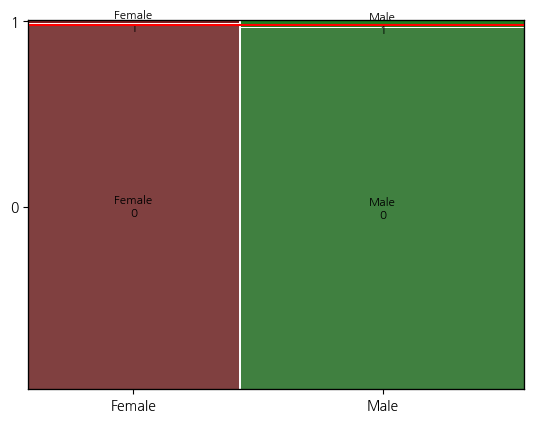

In [53]:
#ÏßÄÏõêÏûêÏùò ÏÑ±Î≥ÑÍ≥º ÏäπÏù∏ Ïó¨Î∂Ä Í¥ÄÍ≥ÑÌôïÏù∏ 
from statsmodels.graphics.mosaicplot import mosaic
mosaic(train, ['Gender', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()
#ÏÑ±Î≥ÑÏóê Îî∞Î•∏ ÎåÄÏ∂ú ÏäπÏù∏Ïó¨Î∂ÄÎäî Í¥ÄÎ†®Ïù¥ ÏûàÏñ¥Î≥¥Ïù¥ÏßÄÎäî ÏïäÎäîÎã§. 

In [ ]:
mosaic(train, ['', 'Approved'])
plt.axhline(1- train['Approved'].mean(), color = 'r')
plt.show()

In [ ]:
#Í∞Å Ï±ÑÎÑêÎ≥Ñ ÏäπÏù∏Í≥º ÎØ∏ÏäπÏù∏ ÏºÄÏù¥Ïä§Î°ú ÎÇòÎà† ÌäπÏßï ÌôïÏù∏ 
#sns.hue ÎπÑÏä∑ÌïòÍ≤å 
fig = px.bar(train, x="Approved", y="", color="Approved", facet_col='Source')
#,              line_group="Approved")
fig.show()

In [5]:
#ÌïúÎ≤à ÏÑúÎπÑÏä§Î•º Î¨∏ÏùòÌñàÎçò Í≥†Í∞ùÏù¥ Îòê Ï∞æÎäî Í≤ΩÏö∞Î•º Î≥∏Îã§. 

from collections import Counter
# for i,v in Counter(train['ID']).items():
#     if v>1:
#         print(i)
#Î™®Îì† Í≥†Í∞ùÏùÄ ÌïòÎÇòÏùò rowÎßå Í∞ÄÏßê 

In [6]:
#source
#source_category 
train.loc[:,['ID','Source','Source_Category']]

ID Source Source_Category
0      APPC90493171225   S122               G
1      APPD40611263344   S122               G
2      APPE70289249423   S143               B
3      APPF80273865537   S143               B
4      APPG60994436641   S134               B
...                ...    ...             ...
69708  APPU90955789628   S122               G
69709  APPV80989824738   S122               G
69710  APPW50697209842   S122               G
69711  APPY50870035036   S122               G
69712  APPZ60733046119   S122               G

[69713 rows x 3 columns]

In [7]:
#dfÌòïÏãùÏù¥ counterÏóê Îì§Ïñ¥Í∞ÄÎ©¥ ÏùòÎèÑÎåÄÎ°ú ÎÇòÏò§ÏßÄ ÏïäÎäîÎã§. 
#seriesÌòïÏãùÏúºÎ°ú ÎÑ£ÎäîÎã§.
dict((Counter(train.loc[train['Approved']==1,'Source']))).keys()

dict_keys(['S143', 'S133', 'S134', 'S122', 'S159', 'S151', 'S127', 'S144', 'S157', 'S153', 'S161', 'S137', 'S158', 'S141'])

In [8]:
#Í∞Å Î¶¨Îìú Ï∂úÏ≤ò Ï±ÑÎÑêÎ≥Ñ, Î¶¨Îìú Ï∂úÏ≤ò Ï±ÑÎÑêÏùò Íµ¨Î∂ÑÎ≥Ñ ÎàÑÏ†ÅÎπÑÏú® ÌôïÏù∏ 

#(ÎåÄÏ∂úÏÑ±Í≥µ Ïã§Ìå® Íµ¨Î∂ÑÏïàÌï®)Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïï° ÌôïÏù∏
chk=pd.DataFrame({'Î¶¨ÎìúÏ∂úÏ≤ò': dict((Counter(train['Source']))).keys(), 'Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò': dict((Counter(train['Source']))).values()})
#(ÎåÄÏ∂úÏóê ÏÑ±Í≥µÌïú ÏºÄÏù¥Ïä§ Í∏∞Ï§Ä)Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïï° ÌôïÏù∏
#chk_1=pd.DataFrame({'Î¶¨ÎìúÏ∂úÏ≤ò': dict((Counter(train[train['Approved']==1,'Source']))).keys(), 'Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïï°': dict((Counter(train[train['Approved']==1,'Source']))).values()})
chk_1=pd.DataFrame({'Î¶¨ÎìúÏ∂úÏ≤ò': dict((Counter(train.loc[train['Approved']==1,'Source']))).keys(), 'Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò': dict((Counter(train.loc[train['Approved']==1,'Source']))).values()})
#(ÎåÄÏ∂úÏÑ±Í≥µ Ïã§Ìå® Íµ¨Î∂ÑÏïàÌï®)Î¶¨ÎìúÏ∂úÏ≤ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïï° ÌôïÏù∏
chk2=pd.DataFrame({'Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨': dict((Counter(train['Source_Category']))).keys(), 'Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò': dict((Counter(train['Source_Category']))).values()})
#(ÎåÄÏ∂úÏóê ÏÑ±Í≥µÌïú ÏºÄÏù¥Ïä§ Í∏∞Ï§Ä)Î¶¨ÎìúÏ∂úÏ≤ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïï° ÌôïÏù∏
chk2_1=pd.DataFrame({'Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨': dict((Counter(train.loc[train['Approved']==1,'Source_Category']))).keys(), 'Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò': dict((Counter(train.loc[train['Approved']==1,'Source_Category']))).values()})

#ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
chk.sort_values('Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò', ascending=False, inplace=True)
chk_1.sort_values('Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò', ascending=False, inplace=True)
chk2.sort_values('Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò', ascending=False, inplace=True)
chk2_1.sort_values('Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò', ascending=False, inplace=True)
#index reset
chk.reset_index(inplace=True)
chk_1.reset_index(inplace=True)
chk2.reset_index(inplace=True)
chk2_1.reset_index(inplace=True)

#Í∞Å Îç∞Ïù¥ÌÑ∞Î≥ÑÎ°ú ÎàÑÏ†ÅÎπÑÏú® Íµ¨ÌïòÍ∏∞
for i in range(len(chk)):
    chk.loc[i,'ÎàÑÏ†ÅÎπÑÏú®']= sum(chk.loc[0:i+1,'Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])/sum(chk['Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])
    if i < len(chk_1):
        chk_1.loc[i,'ÎàÑÏ†ÅÎπÑÏú®']= sum(chk_1.loc[0:i+1,'Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])/sum(chk_1['Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])
    if i < len(chk2):
        chk2.loc[i,'ÎàÑÏ†ÅÎπÑÏú®']= sum(chk2.loc[0:i+1,'Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])/sum(chk2['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])
    if i < len(chk2_1):
        chk2_1.loc[i,'ÎàÑÏ†ÅÎπÑÏú®']= sum(chk2_1.loc[0:i+1,'Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])/sum(chk2_1['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò'])

In [9]:
#Ï†ÑÏ≤¥ ÎåÄÏÉÅ(ÎåÄÏ∂úÏäπÏù∏ Î∞è ÎØ∏ÏäπÏù∏)
chk
#Ï†ÑÏ≤¥ÎåÄÏÉÅÏúºÎ°ú ÎåÄÏ∂ú Í±¥ÏàòÎ•º Î¥§ÏùÑ Îïå 90%Ïùò Í≥†Í∞ùÏù¥ ÏÉÅÏúÑ 3Í∞úÏùò Î¶¨ÎìúÏ∂úÏ≤òÏóêÏÑú ÎÇòÏôîÎã§.

index  Î¶¨ÎìúÏ∂úÏ≤ò  Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0       0  S122        30941  0.786338
1       3  S133        23877  0.850516
2       4  S159         4474  0.900435
3       1  S143         3480  0.922611
4       6  S127         1546  0.942694
5       5  S137         1400  0.957727
6       2  S134         1048  0.966635
7      13  S161          621  0.974797
8      10  S151          569  0.982069
9      16  S157          507  0.987850
10     11  S153          403  0.991436
11      9  S156          250  0.994922
12      7  S144          243  0.997318
13     19  S158          167  0.998193
14      8  S123           61  0.998852
15     18  S141           46  0.999297
16     17  S162           31  0.999541
17     12  S124           17  0.999641
18     26  S160            7  0.999742
19     25  S150            7  0.999785
20     24  S155            3  0.999828
21     20  S129            3  0.999871
22     21  S136            3  0.999900
23     27  S135            2  0.999928
24     14  S139            2  0.999957
25     23  S138            2  0.999971
26     22  S130            1  0.999986
27     15  S154            1  1.000000
28     28  S140            1  1.000000

In [10]:
#ÎåÄÏ∂ú ÏäπÏù∏ ÏºÄÏù¥Ïä§Îßå
chk_1
#ÎåÄÏ∂úÏäπÏù∏ÏûêÎì§ÏùÄ ÏÉÅÏúÑ 2Í∞úÏùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ ÎÇòÏôîÎã§. 

index  Î¶¨ÎìúÏ∂úÏ≤ò  Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0       3  S122          463  0.836275
1       1  S133          390  0.906863
2       0  S143           72  0.945098
3       2  S134           39  0.975490
4       4  S159           31  0.987255
5       6  S127           12  0.990196
6       5  S151            3  0.993137
7       8  S157            3  0.995098
8      10  S161            2  0.996078
9       7  S144            1  0.997059
10      9  S153            1  0.998039
11     11  S137            1  0.999020
12     12  S158            1  1.000000
13     13  S141            1  1.000000

In [32]:
#(Î¶¨ÎìúÏ∂úÏ≤ò Î≥Ñ) Ï†ÑÏ≤¥ ÎåÄÎπÑ Í∞Å Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïàò ÎπÑÏú® ÌôïÏù∏ 
chk_stack=chk[['Î¶¨ÎìúÏ∂úÏ≤ò','Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']].merge(chk_1[['Î¶¨ÎìúÏ∂úÏ≤ò','Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']], on='Î¶¨ÎìúÏ∂úÏ≤ò')

chk_stack.columns=['Î¶¨ÎìúÏ∂úÏ≤ò','Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò','ÎåÄÏ∂ú_ÏäπÏù∏Ïàò']
chk_stack['ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò'] = chk_stack['Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']-chk_stack['ÎåÄÏ∂ú_ÏäπÏù∏Ïàò']
chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®']=chk_stack['ÎåÄÏ∂ú_ÏäπÏù∏Ïàò']/chk_stack['Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']*100

chk_stack

Î¶¨ÎìúÏ∂úÏ≤ò  Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò  ÎåÄÏ∂ú_ÏäπÏù∏Ïàò  ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò    ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®
0   S122     30941     463     30478  1.496396
1   S133     23877     390     23487  1.633371
2   S159      4474      31      4443  0.692892
3   S143      3480      72      3408  2.068966
4   S127      1546      12      1534  0.776197
5   S137      1400       1      1399  0.071429
6   S134      1048      39      1009  3.721374
7   S161       621       2       619  0.322061
8   S151       569       3       566  0.527241
9   S157       507       3       504  0.591716
10  S153       403       1       402  0.248139
11  S144       243       1       242  0.411523
12  S158       167       1       166  0.598802
13  S141        46       1        45  2.173913

In [35]:
px.bar(chk_stack, x='Î¶¨ÎìúÏ∂úÏ≤ò', y=['ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò','ÎåÄÏ∂ú_ÏäπÏù∏Ïàò'])
#ÎåÄÏ∂úÏã†Ï≤≠Ïù¥ ÎßéÏùÄ Î¶¨ÎìúÏ±ÑÎÑêÏóêÏÑúÎäî ÎåÄÏ∂ú ÏäπÏù∏ÎèÑ ÎπÑÍµêÏ†Å ÎßéÏïòÎã§. 

In [37]:
#Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig = px.box(x=chk_stack['Î¶¨ÎìúÏ∂úÏ≤ò'], y=chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®'])
fig.add_hline(chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®'].mean()) 
fig.show()
#ÌèâÍ∑†Ïù¥ÏÉÅÍ≥º Ïù¥ÌïòÎ°ú ÎÇòÎà† ÎåÄÏ∂úÏäπÏù∏Ïù¥ ÎßéÏùÄ Î¶¨ÎìúÏ±ÑÎÑêÍ≥º ÎåÄÏ∂úÏäπÏù∏Ïù¥ Ï†ÅÏùÄ Î¶¨ÎìúÏ±ÑÎÑêÎ°ú Î≥º Ïàò ÏûàÎã§. 

In [41]:
#Í∞Å Ï±ÑÎÑêÎ≥Ñ ÎåÄÏ∂úÏù¥ Ï†ÅÏùÄ ÏºÄÏù¥Ïä§ÏôÄ ÎßéÏùÄ ÏºÄÏù¥Ïä§ Í∑∏Î£π ÌäπÏßï ÌôïÏù∏ 
upper = chk_stack[chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®']>=chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®'].mean()]
under = chk_stack[chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®']<chk_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®'].mean()]

In [42]:
upper

Î¶¨ÎìúÏ∂úÏ≤ò  Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò  ÎåÄÏ∂ú_ÏäπÏù∏Ïàò  ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò    ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®
0   S122     30941     463     30478  1.496396
1   S133     23877     390     23487  1.633371
3   S143      3480      72      3408  2.068966
6   S134      1048      39      1009  3.721374
13  S141        46       1        45  2.173913

In [43]:
under

Î¶¨ÎìúÏ∂úÏ≤ò  Ï†ÑÏ≤¥_ÎåÄÏ∂úÏã†Ï≤≠Ïàò  ÎåÄÏ∂ú_ÏäπÏù∏Ïàò  ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò    ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®
2   S159      4474      31      4443  0.692892
4   S127      1546      12      1534  0.776197
5   S137      1400       1      1399  0.071429
7   S161       621       2       619  0.322061
8   S151       569       3       566  0.527241
9   S157       507       3       504  0.591716
10  S153       403       1       402  0.248139
11  S144       243       1       242  0.411523
12  S158       167       1       166  0.598802

In [14]:
#dfÏÉùÏÑ±
mid_df=pd.DataFrame(train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
mid_df
#Í∞Å Ï±ÑÎÑêÏùò Ï¥ù ÎåÄÏ∂úÏï°ÏùÑ Î¥§ÏùÑ Îïå ÎåÄÏ∂úÏûê ÏàòÍ∞Ä Ï†ÅÏñ¥ÎèÑ ÏÉÅÎãπÌûà ÎßéÏùÄ ÎåÄÏ∂úÏï°ÏùÑ Î∞õÎäî ÏºÄÏù¥Ïä§Í∞Ä Ï¢ÖÏ¢Ö Î≥¥ÏòÄÎã§. 

count         sum           mean
Source                                  
S153        1    140000.0  140000.000000
S141        1    120000.0  120000.000000
S127       10    625000.0   62500.000000
S159       25   1373000.0   54920.000000
S134       31   1648000.0   53161.290323
S133      323  16259000.0   50337.461300
S161        2    100000.0   50000.000000
S122      388  18681000.0   48146.907216
S143       58   2597000.0   44775.862069
S151        3    132000.0   44000.000000
S158        1     30000.0   30000.000000
S157        2     40000.0   20000.000000
S137        0         0.0            NaN
S144        0         0.0            NaN

In [15]:
#Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂ú Ï¥ù ÏäπÏù∏Ïï°, Ïù∏Îãπ ÌèâÍ∑† ÎåÄÏ∂úÏäπÏù∏Ïï°, ÎåÄÏ∂ú Ï¥ù ÏäπÏù∏Ïï° ÎåÄÎπÑ ÎπÑÏú®
for i in mid_df.index:
    mid_df.loc[i,'ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®']=mid_df.loc[i,'sum']/mid_df['sum'].sum()*100
mid_df.sort_values('ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®', ascending=False)
#ÎåÄÏ∂úÍ∏àÏùò 83%Îäî ÎëêÍ∞úÏùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ ÎÇòÏò®Îã§. 

#Í∑∏Î†áÎã§Î©¥ Îã§Î•∏ Ï±ÑÎÑêÏóêÏÑú ÎåÄÏ∂úÏù¥ Ïôú Ï†ÅÏùÄÏßÄ ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§.
#Î¶¨ÎìúÎ•º ÎÜíÏù¥Îäî Í≤ÉÏùÑ Î™©Ï†ÅÏúºÎ°ú ÌïúÎã§Í≥† ÌñàÎäîÎç∞ 2Í∞úÏùò Ï±ÑÎÑêÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ï±ÑÎÑêÎì§Ïóê ÎåÄÌï¥ ÌôïÏù∏Ìï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§. 

count         sum           mean  ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®
Source                                                  
S122      388  18681000.0   48146.907216       44.750269
S133      323  16259000.0   50337.461300       38.948377
S143       58   2597000.0   44775.862069        6.221104
S134       31   1648000.0   53161.290323        3.947778
S159       25   1373000.0   54920.000000        3.289017
S127       10    625000.0   62500.000000        1.497185
S153        1    140000.0  140000.000000        0.335370
S151        3    132000.0   44000.000000        0.316206
S141        1    120000.0  120000.000000        0.287460
S161        2    100000.0   50000.000000        0.239550
S157        2     40000.0   20000.000000        0.095820
S158        1     30000.0   30000.000000        0.071865
S137        0         0.0            NaN        0.000000
S144        0         0.0            NaN        0.000000

In [33]:
#(Î¶¨ÎìúÏ∂úÏ≤òÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ) Ï†ÑÏ≤¥ ÎåÄÎπÑ Í∞Å Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂úÏã†Ï≤≠Ïàò ÎπÑÏú® ÌôïÏù∏ 
chk2_stack=chk2[['Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨','Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']].merge(chk2_1[['Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨','Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']], on='Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨')
chk2_stack.columns=['Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨','Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò','Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏäπÏù∏Ïàò']
chk2_stack['ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò'] = chk2_stack['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']-chk2_stack['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏäπÏù∏Ïàò']
chk2_stack['ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®']=chk2_stack['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏäπÏù∏Ïàò']/chk2_stack['Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò']*100
chk2_stack
#Î¶¨ÎìúÏ∂úÏ≤ò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú Î¥§ÏùÑ Îïå ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®ÏùÄ 1.4ÌçºÏÑºÌä∏ ÎÇ¥Ïô∏ÏòÄÎã§. 
#ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú ÎåÄÏ∂ú ÏäπÏù∏ÏùÄ Í∑πÏÜåÏàòÎ°ú ÎÇòÏôîÎã§. 

#Ïó¨Í∏∞ÏÑú Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÏ∂ú ÏäπÏù∏Ïù¥ ÎÇú ÏºÄÏù¥Ïä§ÏôÄ ÏäπÏù∏Ïù¥ ÎÇòÏßÄ ÏïäÏùÄ ÏºÄÏù¥Ïä§Ïùò ÌäπÏßïÏùÑ ÎπÑÍµêÌï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏñ¥Î≥¥Ïù∏Îã§. 

Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨  Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò  Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏäπÏù∏Ïàò  ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò    ÎåÄÏ∂úÏäπÏù∏ÎπÑÏú®
0         B          29812            495     29317  1.660405
1         G          26518            364     26154  1.372653
2         C          11374            140     11234  1.230877
3         E           1050             15      1035  1.428571
4         F            459              6       453  1.307190

In [36]:
px.bar(chk2_stack, x='Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨', y=['ÎåÄÏ∂ú_ÎØ∏ÏäπÏù∏_Ïàò','Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏäπÏù∏Ïàò'])

In [18]:
#Î¶¨Îìú Ï±ÑÎÑê Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ df ÏÉùÏÑ±
mid_df2=pd.DataFrame(train.loc[train['Approved']==1,['Source_Category','Loan_Amount']].groupby('Source_Category').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
mid_df2
#GÏ±ÑÎÑêÍ≥º B, C Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ Ïã†Ï≤≠Ìïú ÎåÄÏ∂úÏûêÎì§Ïù¥ Ï£ºÎ°ú ÎåÄÏ∂ú ÏàòÏùµÏù¥ ÎÇ¨Îã§,

count         sum          mean
Source_Category                                 
C                  140  10619000.0  75850.000000
F                    6    450000.0  75000.000000
G                  298  15078000.0  50597.315436
B                  389  15302000.0  39336.760925
E                   12    296000.0  24666.666667

In [19]:
#Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ ÎåÄÏ∂ú Ï¥ù ÏäπÏù∏Ïï°, Ïù∏Îãπ ÌèâÍ∑† ÎåÄÏ∂úÏäπÏù∏Ïï°, ÎåÄÏ∂ú Ï¥ù ÏäπÏù∏Ïï° ÎåÄÎπÑ ÎπÑÏú®
for i in mid_df2.index:
    mid_df2.loc[i,'ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®']=mid_df2.loc[i,'sum']/mid_df2['sum'].sum()*100
mid_df2.sort_values('ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®', ascending=False)
#ÎåÄÏ∂ú ÏàòÏùµÏùò 98%Îäî 3Í∞úÏùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ ÎÇòÏò®Îã§. 
#ÎÇòÎ®∏ÏßÄ Ï±ÑÎÑêÏóê ÎåÄÌï¥ÏÑ† Ïôú ÎåÄÏ∂úÏàòÏùµÏù¥ Ïûò ÎÇòÏò§ÏßÄ ÏïäÎäîÍ≤ÉÏùºÍπå?

count         sum          mean  ÎåÄÏ∂ú_Ï¥ù_ÏäπÏù∏Ïï°_ÎåÄÎπÑ_ÎπÑÏú®
Source_Category                                                 
B                  389  15302000.0  39336.760925       36.655887
G                  298  15078000.0  50597.315436       36.119296
C                  140  10619000.0  75850.000000       25.437777
F                    6    450000.0  75000.000000        1.077973
E                   12    296000.0  24666.666667        0.709067

97

In [ ]:
#Î≥¥Î•ò
#https://wikidocs.net/186273
#https://stackoverflow.com/questions/60992109/valueerror-invalid-elements-received-for-the-data-property
import plotly.graph_objects as pgo #Í∑∏ÎûòÌîÑ ÌïúÍ≥≥Ïóê Ïó¨Îü¨Í∞ú Í∑∏Î¶¨Í∏∞ 

fig2 = pgo.Figure()

#https://wikidocs.net/188204
#plotlyÎ°ú Í∑∏Î¶¨Í≥† summary ÌôïÏù∏Í∞ÄÎä• 

#trendline="ols" Î∂àÍ∞Ä
for i,v in enumerate(retention['cohort'].unique()):
    fig2.add_trace(pgo.bar(x=chk_stack['Î¶¨ÎìúÏ∂úÏ≤ò'], y=retention.loc[retention['cohort']==v,'retention_rate'].reset_index(drop=True), name=f'{v}'))
fig2.show()

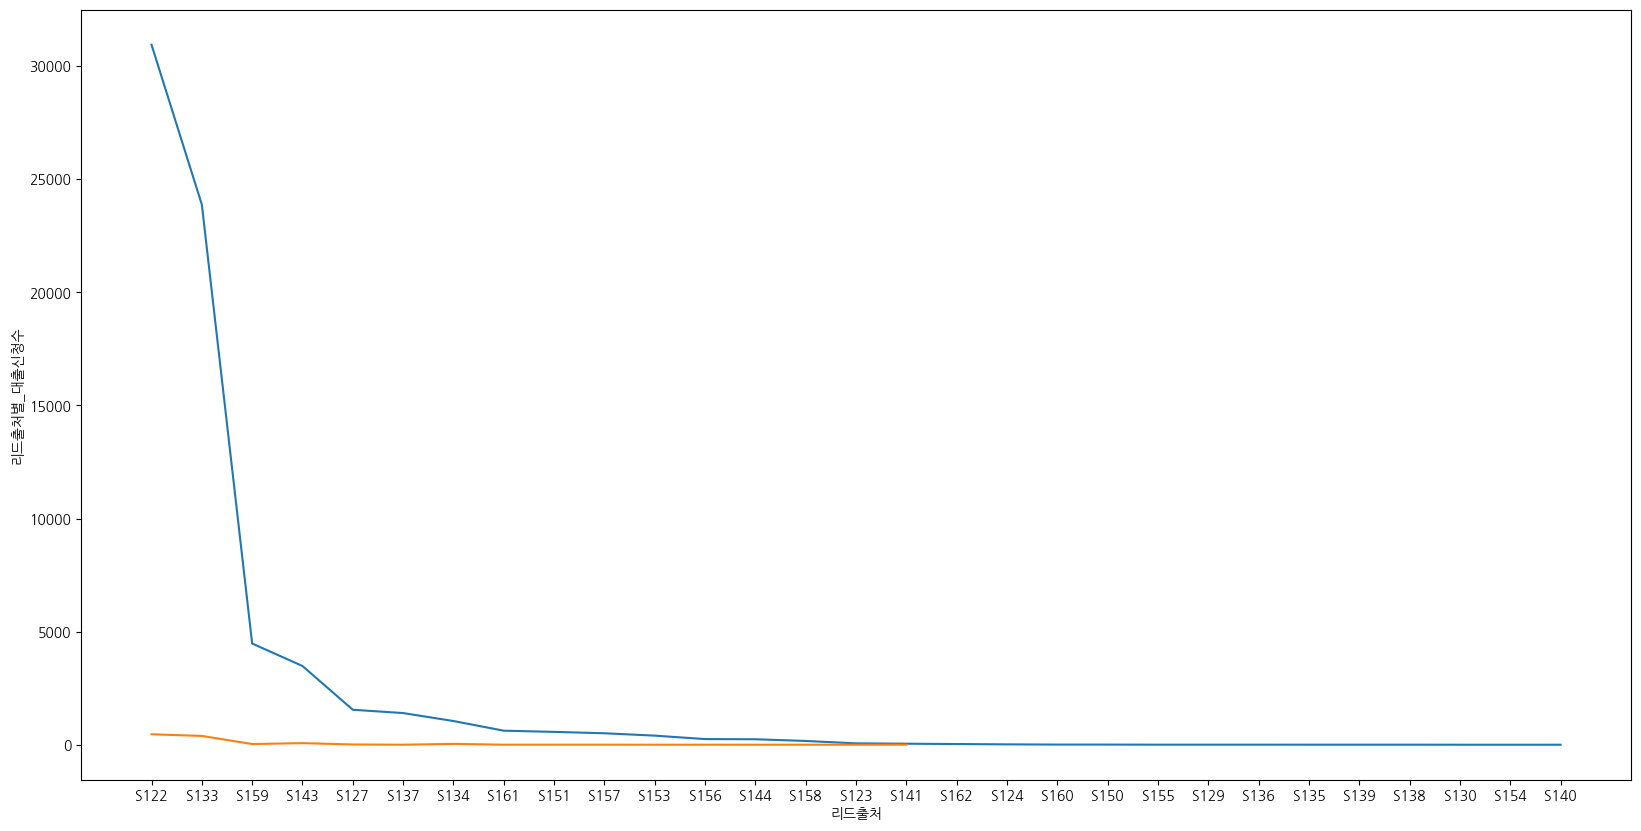

In [95]:
#Í∞Å Î¶¨Îìú Ï∂úÏ≤ò Ï±ÑÎÑêÎ≥Ñ ÎàÑÏ†ÅÎπÑÏú® ÌôïÏù∏
#plt.subplot(2,2)
plt.figure(figsize=[20,10])
sns.lineplot(chk, x='Î¶¨ÎìúÏ∂úÏ≤ò', y='Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò')
sns.lineplot(chk_1, x='Î¶¨ÎìúÏ∂úÏ≤ò', y='Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò')
plt.show()
#ÏÉÅÏúÑ 3Í∞úÎ•º ÌÜµÌï¥ ÏÉÅÎãπÌûà ÎßéÏùÄ ÏÇ¨ÎûåÎì§Ïù¥ ÎåÄÏ∂úÏùÑ ÏßÄÏõêÌïúÍ≤É Í∞ôÎã§.

In [ ]:

plt.figure(figsize=(15, 6))
sns.lineplot(x='cohort_size(month)', y='retention_rate', data=retention, marker='o', hue='cohort', palette='Set2')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#https://wikidocs.net/186273
#https://stackoverflow.com/questions/60992109/valueerror-invalid-elements-received-for-the-data-property
import plotly.graph_objects as pgo #Í∑∏ÎûòÌîÑ ÌïúÍ≥≥Ïóê Ïó¨Îü¨Í∞ú Í∑∏Î¶¨Í∏∞ 

fig2 = pgo.Figure()

#https://wikidocs.net/188204
#plotlyÎ°ú Í∑∏Î¶¨Í≥† summary ÌôïÏù∏Í∞ÄÎä• 

#trendline="ols" Î∂àÍ∞Ä
for i,v in enumerate(retention['cohort'].unique()):
    fig2.add_trace(pgo.Scatter(x=retention.loc[retention['cohort']==v,'cohort_size(month)'].reset_index(drop=True), y=retention.loc[retention['cohort']==v,'retention_rate'].reset_index(drop=True), name=f'{v}'))
fig2.show()

In [91]:
#Îã®ÏàúÌûà Î¶¨Îìú Ïàò ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î¥§ÏùÑ Îïå(Ï†ÑÏ≤¥Í∏∞Ï§Ä)
chk

#ÏÉÅÏúÑ 3Í∞úÏùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ Ï£ºÎ°ú Í≥†Í∞ùÎì§Ïù¥ ÏÑúÎπÑÏä§Î•º Ï∞æÏïÑÏò®Îã§. Í∑∏Î†áÎã§Î©¥ Îã§Î•∏ Ï±ÑÎÑêÎì§ÏùÄ Íµ≥Ïù¥ Ïó¥Ïñ¥Îëò ÌïÑÏöîÍ∞Ä ÏûàÏùÑÏßÄ ÏùòÎ¨∏Ïù¥Îã§. 
#ÎßåÏïΩ Ï±ÑÎÑêÏùÑ Ïó¥Ïñ¥ÎëêÎäîÎç∞ ÎìúÎäî ÎπÑÏö©Ïóê ÎπÑÌï¥ Ï±ÑÎÑêÏóê Îì§Ïñ¥Ïò§Îäî ÏÇ¨ÎûåÎì§Ïù¥ ÎÇ¥Îäî ÏàòÏùµÏù¥ Í∑∏Î†áÏßÄ Î™ªÌïòÎã§Î©¥ Ïó¥Ïñ¥Îëò ÌïÑÏöîÎäî ÏóÜÏùÑ Í≤É Í∞ôÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏßÄÎßå.
#Í∏∞Ï°¥Ïùò ÌîÑÎ°úÏ†ùÌä∏Ïùò Î™©Ï†ÅÏóêÎäî Ï±ÑÎÑê Î¶¨Îìú ÏàòÎ•º ÎäòÎ¶¨Îäî Í≤ÉÎèÑ Î™©Ï†ÅÏù¥ÎØÄÎ°ú Ïò§ÌûàÎ†§ Ï±ÑÎÑêÏùÑ Îã´ÎäîÍ≤ÉÏùÑ Ï†úÏïàÌïòÎäî Í≤ÉÏùÄ Ï†ÅÌï©ÌïòÏßÄ Î™ªÌïúÎìØ ÌïòÎã§. 

#ÎßåÏïΩ Ï±ÑÎÑêÏùÑ Ï†ïÎ¶¨ÌïúÎã§Í≥† Ìï† Í≤ΩÏö∞ÎùºÎ©¥[Ï∂îÍ∞Ä Î∂ÑÏÑùÍ∞ÄÎä•]

#Í∑∏Î†áÎã§Î©¥ 3Í∞úÏõî ÎèôÏïà Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌñàÎäîÎç∞ 10Î™Ö ÎØ∏ÎßåÏù¥ Îì§Ïñ¥Ïò® Ï±ÑÎÑêÎì§Ïùò Í≤ΩÏö∞ Ïôú Ïù¥Îü∞Í≤ÉÏù∏ÏßÄ ÏõêÏù∏ÏùÑ Í∑úÎ™ÖÌï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÎã§.
#Í¥ëÍ≥†Í∞Ä Î∂ÄÏ°±ÌñàÏùÑÍπå? ÌÉÄÍ≤üÌåÖÏù¥ Î∂ÄÏ°±ÌñàÏùÑÍπå? Îã®ÏàúÌûà ÎåÄÏ∂úÏã†Ï≤≠ÏûêÏùò Í∏∞Ï§ÄÏù¥ ÎØ∏Îã¨ÎêòÏñ¥ÏÑú Í∑∏Îü∞Í≤ÉÏùºÍπå?(=Í∏∞Ï§ÄÏù¥ ÎØ∏Îã¨Îêú Ïã†Ï≤≠ÏûêÎì§Ïù¥ Ï£ºÎ°ú Ïù¥ Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ Îì§Ïñ¥Ïò§ÎäîÍ≤ÉÏùÄ ÏïÑÎãêÍπå?)

index  Î¶¨ÎìúÏ∂úÏ≤ò  Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0       0  S122        30941  0.786338
1       3  S133        23877  0.850516
2       4  S159         4474  0.900435
3       1  S143         3480  0.922611
4       6  S127         1546  0.942694
5       5  S137         1400  0.957727
6       2  S134         1048  0.966635
7      13  S161          621  0.974797
8      10  S151          569  0.982069
9      16  S157          507  0.987850
10     11  S153          403  0.991436
11      9  S156          250  0.994922
12      7  S144          243  0.997318
13     19  S158          167  0.998193
14      8  S123           61  0.998852
15     18  S141           46  0.999297
16     17  S162           31  0.999541
17     12  S124           17  0.999641
18     26  S160            7  0.999742
19     25  S150            7  0.999785
20     24  S155            3  0.999828
21     20  S129            3  0.999871
22     21  S136            3  0.999900
23     27  S135            2  0.999928
24     14  S139            2  0.999957
25     23  S138            2  0.999971
26     22  S130            1  0.999986
27     15  S154            1  1.000000
28     28  S140            1  1.000000

In [92]:
#ÎåÄÏ∂úÏóê ÏÑ±Í≥µÌïú ÏºÄÏù¥Ïä§Îßå ÌôïÏù∏
chk_1
#ÎåÄÏ∂ú ÏäπÏù∏Ïù¥ ÎÇú Í≥†Í∞ùÎì§Ïùò 95%Îäî ÏÉÅÏúÑ 3Í∞úÏùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ Îì§Ïñ¥ÏôîÎã§. 

index  Î¶¨ÎìúÏ∂úÏ≤ò  Î¶¨ÎìúÏ∂úÏ≤òÎ≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0       3  S122          463  0.836275
1       1  S133          390  0.906863
2       0  S143           72  0.945098
3       2  S134           39  0.975490
4       4  S159           31  0.987255
5       6  S127           12  0.990196
6       5  S151            3  0.993137
7       8  S157            3  0.995098
8      10  S161            2  0.996078
9       7  S144            1  0.997059
10      9  S153            1  0.998039
11     11  S137            1  0.999020
12     12  S158            1  1.000000
13     13  S141            1  1.000000

In [ ]:
#ÎåÄÏ∂úÏäπÏù∏Ïú® ÌôïÏù∏(ÎåÄÏ∂úÏäπÏù∏/Ï†ÑÏ≤¥)

#

In [93]:
chk2
#ÎåÄÏ∂ú Ïã†Ï≤≠ÏûêÎäî BÏôÄ GÏ±ÑÎÑêÎßåÏúºÎ°ú Ï†ÑÏ≤¥Ïùò 97%Í∞Ä ÏßÄÏõêÌñàÎã§. 

index Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨  Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0      1         B          29812  0.808027
1      0         G          26518  0.971182
2      2         C          11374  0.986244
3      3         E           1050  0.993373
4      5         D            497  0.999957
5      4         F            459  1.000000
6      6         A              3  1.000000

In [94]:
chk2_1
#ÎåÄÏ∂ú BÏôÄ GÏ±ÑÎÑêÎßåÏúºÎ°ú Ï†ÑÏ≤¥Ïùò 97%Í∞Ä ÏßÄÏõêÌïúÎã§.

#Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÎåÄÏ∂úÏã†Ï≤≠ÏûêÏùò ÎåÄÏ∂úÏäπÏù∏Ïú® ÌôïÏù∏ 

index Î¶¨ÎìúÏ∂úÏ≤ò_Ïπ¥ÌÖåÍ≥†Î¶¨  Î¶¨ÎìúÏπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ_ÎåÄÏ∂úÏã†Ï≤≠Ïàò      ÎàÑÏ†ÅÎπÑÏú®
0      0         B            495  0.842157
1      4         G            364  0.979412
2      1         C            140  0.994118
3      3         E             15  1.000000
4      2         F              6  1.000000

In [29]:
train.columns

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')

In [37]:
train[['Source','Source_Category','Loan_Amount']]

Source Source_Category  Loan_Amount
0       S122               G          NaN
1       S122               G      20000.0
2       S143               B      45000.0
3       S143               B      92000.0
4       S134               B      50000.0
...      ...             ...          ...
69708   S122               G          NaN
69709   S122               G          NaN
69710   S122               G      24000.0
69711   S122               G      80000.0
69712   S122               G      69000.0

[69713 rows x 3 columns]

Loan_Amount                           
             count         sum           mean
Source                                       
S122           388  18681000.0   48146.907216
S127            10    625000.0   62500.000000
S133           323  16259000.0   50337.461300
S134            31   1648000.0   53161.290323
S137             0         0.0            NaN
S141             1    120000.0  120000.000000
S143            58   2597000.0   44775.862069
S144             0         0.0            NaN
S151             3    132000.0   44000.000000
S153             1    140000.0  140000.000000
S157             2     40000.0   20000.000000
S158             1     30000.0   30000.000000
S159            25   1373000.0   54920.000000
S161             2    100000.0   50000.000000

In [51]:
train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean'])

Loan_Amount                           
             count         sum           mean
Source                                       
S122           388  18681000.0   48146.907216
S127            10    625000.0   62500.000000
S133           323  16259000.0   50337.461300
S134            31   1648000.0   53161.290323
S137             0         0.0            NaN
S141             1    120000.0  120000.000000
S143            58   2597000.0   44775.862069
S144             0         0.0            NaN
S151             3    132000.0   44000.000000
S153             1    140000.0  140000.000000
S157             2     40000.0   20000.000000
S158             1     30000.0   30000.000000
S159            25   1373000.0   54920.000000
S161             2    100000.0   50000.000000

In [57]:
#Ï±ÑÎÑêÎ≥Ñ ÎåÄÏ∂ú ÏäπÏù∏ Ï¥ùÏï°Í≥º Ïù∏Îãπ ÌèâÍ∑†Ïï°
pd.DataFrame(train.loc[train['Approved']==1,['Source','Loan_Amount']].groupby('Source').agg(['count','sum','mean']))['Loan_Amount'].sort_values('mean', ascending=False)
#Ïù∏Îãπ ÌèâÍ∑†Ïï°ÏùÄ ÏÜåÏàòÍ∞Ä Ïù¥Ïö©ÌïòÎäî Ï±ÑÎÑêÏùò Í≥†Í∞ùÎì§Ïù¥ ÎÜíÏïòÎã§.
#ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏù¥(300Î™Ö Ïù¥ÏÉÅ) Ïù¥Ïö©Ìïú Ï±ÑÎÑêÏùò ÌèâÍ∑†ÏùÄ 5Îßå Îã¨Îü¨ Ï†ïÎèÑÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.



count         sum           mean
Source                                  
S153        1    140000.0  140000.000000
S141        1    120000.0  120000.000000
S127       10    625000.0   62500.000000
S159       25   1373000.0   54920.000000
S134       31   1648000.0   53161.290323
S133      323  16259000.0   50337.461300
S161        2    100000.0   50000.000000
S122      388  18681000.0   48146.907216
S143       58   2597000.0   44775.862069
S151        3    132000.0   44000.000000
S158        1     30000.0   30000.000000
S157        2     40000.0   20000.000000
S137        0         0.0            NaN
S144        0         0.0            NaN